# AMAZON SALES ANALYSIS:

Import the required Libraries and colors:

In [138]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as mp
import joypy
#Importing colours

colors = ["#b1e7cd","#854442","#000000","#fff4e6","#3c2f2f",
           "#be9b7b ","#512E5F","#45B39D","#AAB7B8 ","#20B2AA",
           "#FF69B4","#00CED1","#FF7F50","#7FFF00","#DA70D6","#45B39D"]

Import the dataset

In [2]:
data = pd.read_csv('Amazon Sales data.csv')
sales_data = data.copy()
sales_data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [3]:
sales_data = sales_data[["Order ID","Order Date","Order Priority","Ship Date","Item Type","Region","Country","Sales Channel","Units Sold","Unit Price","Unit Cost","Total Revenue","Total Cost","Total Profit"]]

In [4]:
sales_data.head()

,Order ID,Order Date,Order Priority,Ship Date,Item Type,Region,Country,Sales Channel,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,669165933,5/28/2010,H,6/27/2010,Baby Food,Australia and Oceania,Tuvalu,Offline,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,963881480,8/22/2012,C,9/15/2012,Cereal,Central America and the Caribbean,Grenada,Online,2804,205.70,117.11,576782.80,328376.44,248406.36
2,341417157,5/2/2014,L,5/8/2014,Office Supplies,Europe,Russia,Offline,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,514321792,6/20/2014,C,7/5/2014,Fruits,Sub-Saharan Africa,Sao Tome and Principe,Online,8102,9.33,6.92,75591.66,56065.84,19525.82
4,115456712,2/1/2013,L,2/6/2013,Office Supplies,Sub-Saharan Africa,Rwanda,Offline,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [5]:
sales_data.columns

Index(['Order ID', 'Order Date', 'Order Priority', 'Ship Date', 'Item Type',
       'Region', 'Country', 'Sales Channel', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [6]:
sales_data.axes[0]

RangeIndex(start=0, stop=100, step=1)

In [7]:
sales_data.axes[1]

Index(['Order ID', 'Order Date', 'Order Priority', 'Ship Date', 'Item Type',
       'Region', 'Country', 'Sales Channel', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [8]:
sales_data.dtypes

Order ID            int64
Order Date         object
Order Priority     object
Ship Date          object
Item Type          object
Region             object
Country            object
Sales Channel      object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

In [9]:
sales_data.index

RangeIndex(start=0, stop=100, step=1)

In [10]:
sales_data.head()

,Order ID,Order Date,Order Priority,Ship Date,Item Type,Region,Country,Sales Channel,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,669165933,5/28/2010,H,6/27/2010,Baby Food,Australia and Oceania,Tuvalu,Offline,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,963881480,8/22/2012,C,9/15/2012,Cereal,Central America and the Caribbean,Grenada,Online,2804,205.70,117.11,576782.80,328376.44,248406.36
2,341417157,5/2/2014,L,5/8/2014,Office Supplies,Europe,Russia,Offline,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,514321792,6/20/2014,C,7/5/2014,Fruits,Sub-Saharan Africa,Sao Tome and Principe,Online,8102,9.33,6.92,75591.66,56065.84,19525.82
4,115456712,2/1/2013,L,2/6/2013,Office Supplies,Sub-Saharan Africa,Rwanda,Offline,5062,651.21,524.96,3296425.02,2657347.52,639077.50


Checking for null inputs

In [11]:
sales_data.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [137]:
sales_data.loc[:,["Total Revenue","Total Profit"]].iloc[:]

,Total Revenue,Total Profit
Order ID,,
669165933,2533654.00,951410.50
963881480,576782.80,248406.36
341417157,1158502.59,224598.75
514321792,75591.66,19525.82
115456712,3296425.02,639077.50
...,...,...
512878119,97040.64,65214.72
810711038,58471.11,15103.47
728815257,228779.10,93748.05


In [13]:
sales_data.shape

(100, 14)

In [14]:
np.corrcoef(sales_data.loc[:,'Total Revenue'].iloc[:],sales_data.loc[:,'Total Profit'].iloc[:])

array([[1.        , 0.89732687],
       [0.89732687, 1.        ]])

In [15]:
sales_data.set_index('Order ID',inplace=True)

In [16]:
sales_data.head()

,Order Date,Order Priority,Ship Date,Item Type,Region,Country,Sales Channel,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Order ID,,,,,,,,,,,,,
669165933,5/28/2010,H,6/27/2010,Baby Food,Australia and Oceania,Tuvalu,Offline,9925,255.28,159.42,2533654.00,1582243.50,951410.50
963881480,8/22/2012,C,9/15/2012,Cereal,Central America and the Caribbean,Grenada,Online,2804,205.70,117.11,576782.80,328376.44,248406.36
341417157,5/2/2014,L,5/8/2014,Office Supplies,Europe,Russia,Offline,1779,651.21,524.96,1158502.59,933903.84,224598.75
514321792,6/20/2014,C,7/5/2014,Fruits,Sub-Saharan Africa,Sao Tome and Principe,Online,8102,9.33,6.92,75591.66,56065.84,19525.82
115456712,2/1/2013,L,2/6/2013,Office Supplies,Sub-Saharan Africa,Rwanda,Offline,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [17]:
sales_data[['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']].corr()

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Units Sold,1.000000,-0.070486,-0.092232,0.447784,0.374746,0.564550
Unit Price,-0.070486,1.000000,0.987270,0.752360,0.787905,0.557365
Unit Cost,-0.092232,0.987270,1.000000,0.715623,0.774895,0.467214
Total Revenue,0.447784,0.752360,0.715623,1.000000,0.983928,0.897327
Total Cost,0.374746,0.787905,0.774895,0.983928,1.000000,0.804091
Total Profit,0.564550,0.557365,0.467214,0.897327,0.804091,1.000000


1) The high value of Pearson correlation coefficient between Total Revenue and Total Profit indicates that these two variables are closely related to each other.
2) Revenue generated is directly proportional to profit generated and vice versa.
3) The negative value of correlation coefficient among Units Sold and Unit Cost implies that quantity of products is inversely proportional to their cost. Same is the scenario with Units Sold and Units Price. Lesser the number of units of a product available, more will be it's price.

In [18]:
sales_data.describe(include = np.number )

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


At an average, the profit generated for a product is ₹441681.98.

Maximum and minimum profit generated are ₹ 1719922.04 and ₹ 1258.09 respectively.

# Let's study total revenue

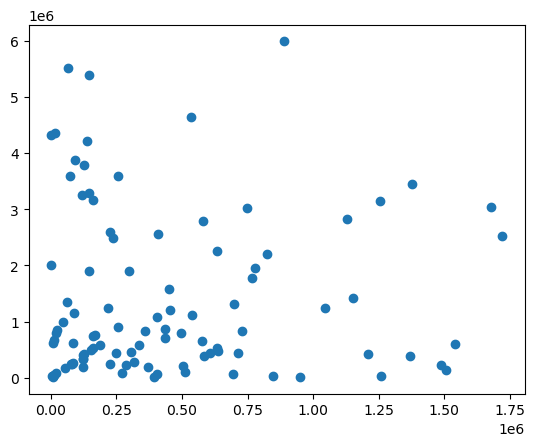

In [30]:
mp.scatter(sales_data['Total Profit'],sales_data['Total Revenue'])

The scatter plot also suggests that total profit and total revenue are directly proportional to each other.

(array([44., 18.,  8.,  6.,  6.,  9.,  2.,  4.,  1.,  2.]),
 array([4.87026000e+03, 6.04088732e+05, 1.20330720e+06, 1.80252568e+06,
        2.40174415e+06, 3.00096262e+06, 3.60018109e+06, 4.19939956e+06,
        4.79861804e+06, 5.39783651e+06, 5.99705498e+06]),
 <BarContainer object of 10 artists>)

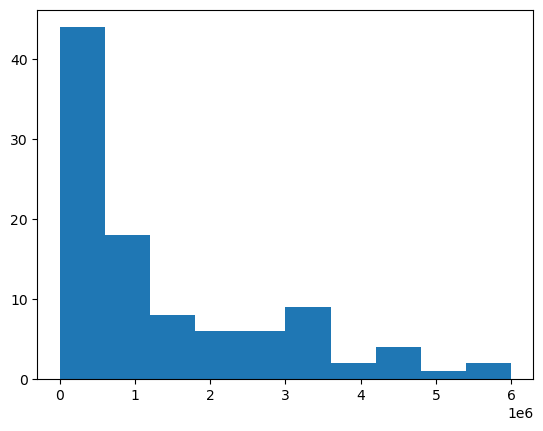

In [31]:
mp.hist(sales_data['Total Revenue'])

In [27]:
np.histogram(sales_data['Total Cost'],bins=10)

(array([53, 13,  6,  5,  9,  8,  1,  2,  0,  3]),
 array([3.61224000e+03, 4.54230412e+05, 9.04848584e+05, 1.35546676e+06,
        1.80608493e+06, 2.25670310e+06, 2.70732127e+06, 3.15793944e+06,
        3.60855762e+06, 4.05917579e+06, 4.50979396e+06]))

(array([33., 20.,  7.,  6.,  3.,  3.,  2.,  3.,  5.,  4.,  3.,  5.,  1.,
         0.,  0.,  2.,  0.,  0.,  1.,  2.]),
 array([3.61224000e+03, 2.28921326e+05, 4.54230412e+05, 6.79539498e+05,
        9.04848584e+05, 1.13015767e+06, 1.35546676e+06, 1.58077584e+06,
        1.80608493e+06, 2.03139401e+06, 2.25670310e+06, 2.48201219e+06,
        2.70732127e+06, 2.93263036e+06, 3.15793944e+06, 3.38324853e+06,
        3.60855762e+06, 3.83386670e+06, 4.05917579e+06, 4.28448487e+06,
        4.50979396e+06]),
 <BarContainer object of 20 artists>)

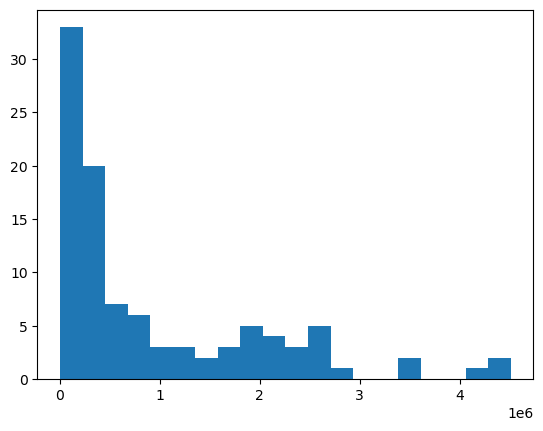

In [28]:
mp.hist(sales_data['Total Cost'],bins=20)

# Consider units sold and unit cost

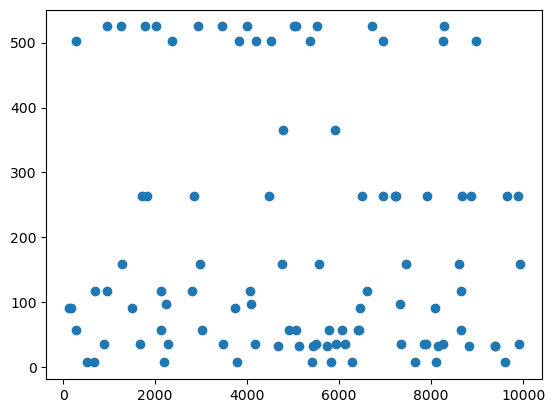

In [37]:
mp.scatter(sales_data['Units Sold'],sales_data['Unit Cost'])

The above scatter plot implies that the two variables 'Units Sold' and 'Unit Cost' are inversely proportional to each other to some extent. When more units of a product are sold, the unit cost of that product becomes lesser and vice versa.

array([<Axes: xlabel='Units Sold'>], dtype=object)

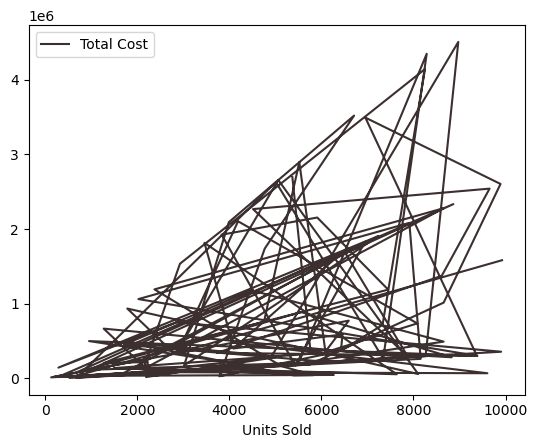

In [30]:
sales_data.plot.line(x='Units Sold',y='Total Cost',subplots=True,color={'Total Cost': '#3c2f2f'})

(array([41.,  9., 14.,  0., 13.,  0.,  2.,  0.,  0., 21.]),
 array([  6.92 ,  58.724, 110.528, 162.332, 214.136, 265.94 , 317.744,
        369.548, 421.352, 473.156, 524.96 ]),
 <BarContainer object of 10 artists>)

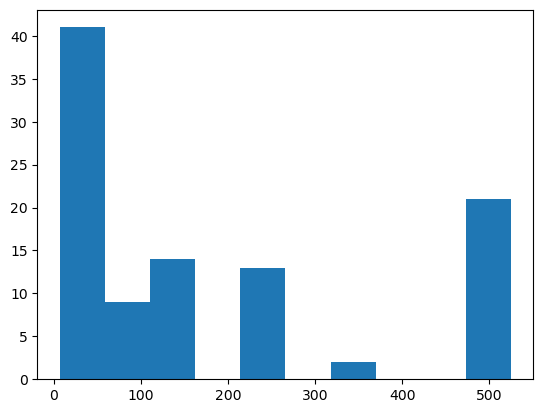

In [39]:
mp.hist(sales_data['Unit Cost'])

Text(0, 0.5, 'Total Profit')

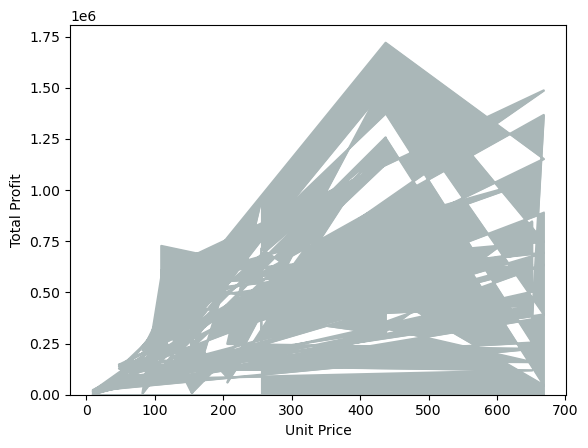

In [31]:
area_plot = sales_data.plot.area(x='Unit Price',y='Total Profit',color='#AAB7B8',stacked=True,legend=None)
mp.ylabel('Total Profit')

Maximum profit has been generated in the unit price range of ₹400-₹500.

Text(0, 0.5, 'Total Profit')

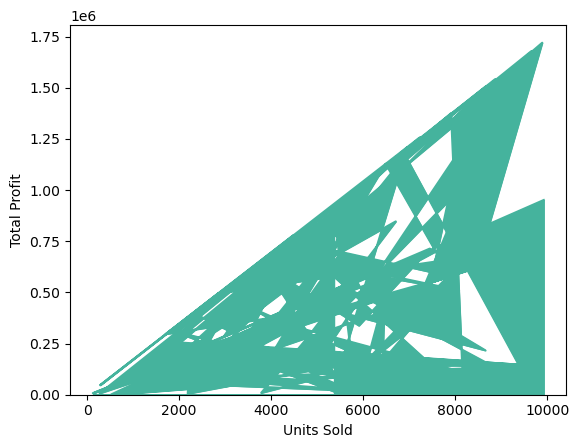

In [33]:
sales_data.plot.area(x='Units Sold',y='Total Profit',color='#45B39D',legend=None)
mp.ylabel('Total Profit')

Maximum profit has been generated when the number of units sold were between 8000 and 10000 i.e. more the number of units sold, more will be the profit generated.

Text(0, 0.5, 'Total Cost')

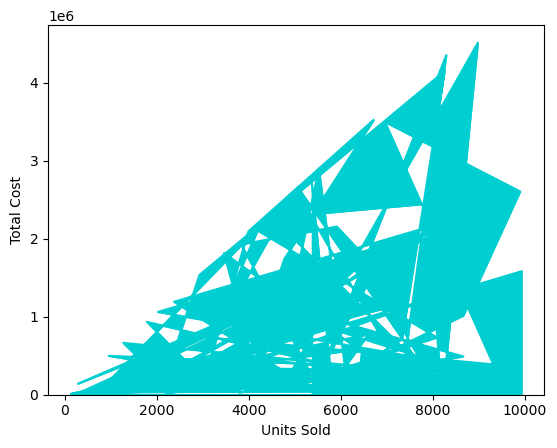

In [40]:
sales_data.plot.area(x='Units Sold',y='Total Cost',color='#00CED1',legend=None)
mp.ylabel('Total Cost')

Maximum cost has been generated when 8000-9000 units were sold.

Text(0, 0.5, 'Total Revenue')

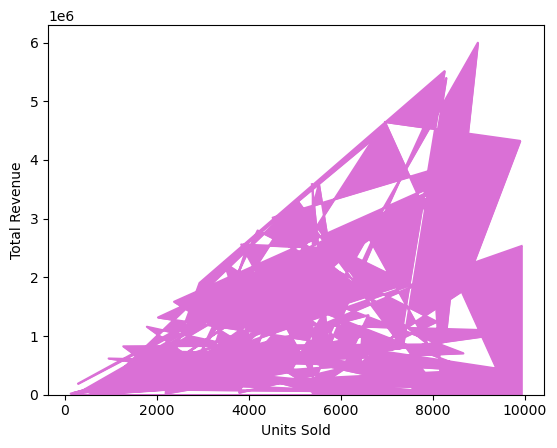

In [35]:
sales_data.plot.area(x='Units Sold',y='Total Revenue',color='#DA70D6',legend=None)
mp.ylabel('Total Revenue')

Maximum revenue has been generated when 5000-6500 units of a product were sold.

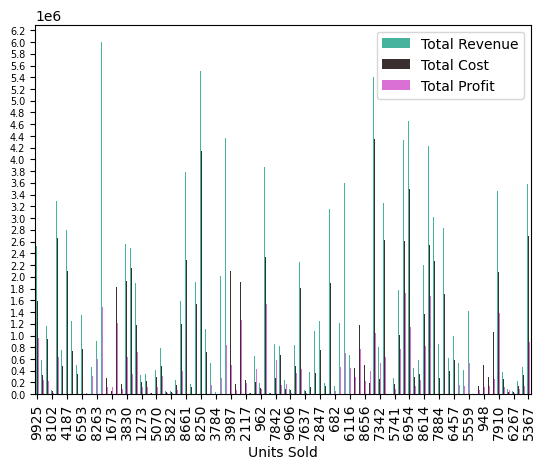

In [41]:
bar_plot = sales_data.plot.bar(x='Units Sold',y=['Total Revenue','Total Cost','Total Profit'],color=['#45B39D','#3c2f2f','#DA70D6'],stacked=False,rot=True)
mp.xticks(rotation=90)
mp.locator_params(nbins=38)
mp.tick_params(axis='y', which='major', labelsize=7)

Text(0.5, 0, 'Total Revenue')

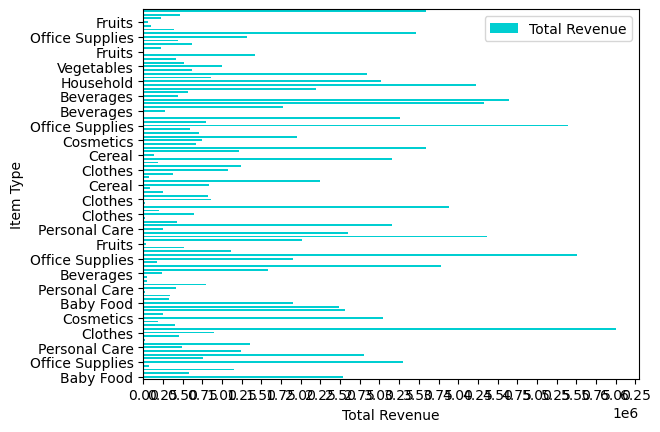

In [37]:
sales_data.plot.barh(x='Item Type',y='Total Revenue',color='#00CED1')
mp.locator_params(nbins=28)
mp.xlabel('Total Revenue')

In [53]:
sales_data['Item Type'].unique()

array(['Baby Food', 'Cereal', 'Office Supplies', 'Fruits', 'Household',
       'Vegetables', 'Personal Care', 'Clothes', 'Cosmetics', 'Beverages',
       'Meat', 'Snacks'], dtype=object)

In [54]:
items = ['Baby Food', 'Cereal', 'Office Supplies', 'Fruits', 'Household',
       'Vegetables', 'Personal Care', 'Clothes', 'Cosmetics', 'Beverages',
       'Meat', 'Snacks']

In [55]:
sales_data['Item Type'] = pd.Categorical(sales_data['Item Type'],categories=items,ordered=True)

<Axes: xlabel='Item Type'>

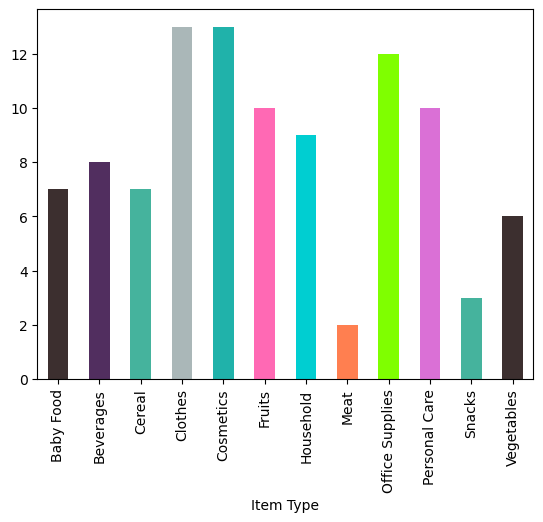

In [42]:
sales_data.groupby('Item Type')['Total Revenue'].count().plot(kind='bar',color=['#3c2f2f','#512E5F','#45B39D','#AAB7B8','#20B2AA','#FF69B4','#00CED1','#FF7F50','#7FFF00','#DA70D6','#45B39D'])

<Axes: xlabel='Item Type'>

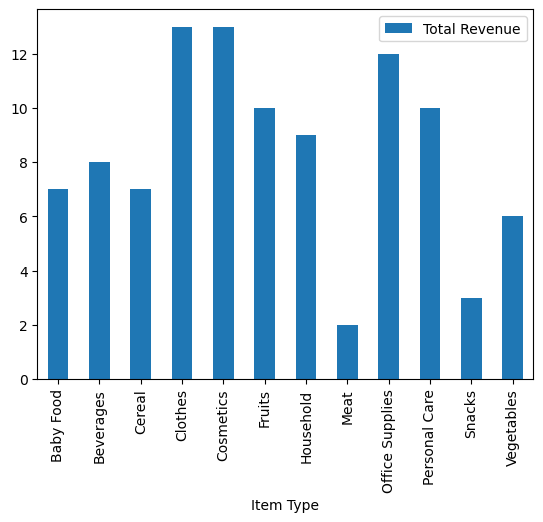

In [44]:
pd.pivot_table(sales_data,values='Total Revenue',index='Item Type',aggfunc='count').plot(kind='bar')

Maximum revenue has been generated from the items 'Clothes' and 'Cosmetics' closely followed by 'Office Supplies'.

Text(0.5, 0, 'Units Sold')

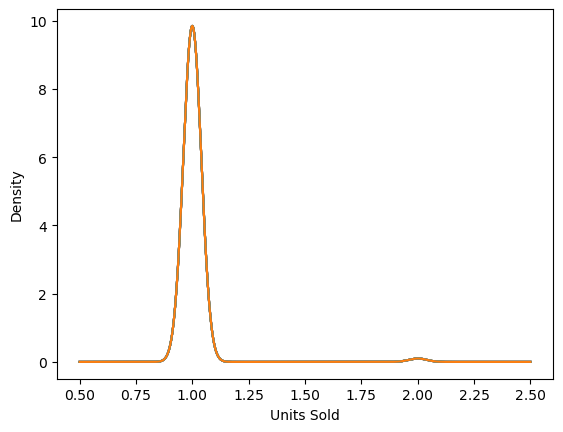

In [58]:
#pd.pivot_table(sales_data,values=['Total Revenue','Total Cost','Total Profit'],index='Units Sold',aggfunc='count').plot(kind='kde',color=['green','orange','red'],stacked=True)
pd.pivot_table(sales_data,index='Units Sold',aggfunc='count').plot(kind='kde',stacked=True,legend=None)
mp.xlabel('Units Sold')

In [60]:
sales_data.loc[:,'Order Priority'].unique()

array(['H', 'C', 'L', 'M'], dtype=object)

In [61]:
sales_data['Order Date'].unique()

<DatetimeArray>
['2010-05-28 00:00:00', '2012-08-22 00:00:00', '2014-05-02 00:00:00',
 '2014-06-20 00:00:00', '2013-02-01 00:00:00', '2015-02-04 00:00:00',
 '2011-04-23 00:00:00', '2012-07-17 00:00:00', '2015-07-14 00:00:00',
 '2014-04-18 00:00:00', '2011-06-24 00:00:00', '2014-08-02 00:00:00',
 '2017-01-13 00:00:00', '2017-02-08 00:00:00', '2014-02-19 00:00:00',
 '2012-04-23 00:00:00', '2016-11-19 00:00:00', '2015-04-01 00:00:00',
 '2010-12-30 00:00:00', '2012-07-31 00:00:00', '2014-05-14 00:00:00',
 '2015-07-31 00:00:00', '2016-06-30 00:00:00', '2014-09-08 00:00:00',
 '2016-05-07 00:00:00', '2017-05-22 00:00:00', '2014-10-13 00:00:00',
 '2010-05-07 00:00:00', '2014-07-18 00:00:00', '2012-05-26 00:00:00',
 '2012-09-17 00:00:00', '2013-12-29 00:00:00', '2015-10-27 00:00:00',
 '2015-01-16 00:00:00', '2017-02-25 00:00:00', '2017-05-08 00:00:00',
 '2011-11-22 00:00:00', '2017-01-14 00:00:00', '2012-04-01 00:00:00',
 '2012-02-16 00:00:00', '2017-03-11 00:00:00', '2010-02-06 00:00:00',
 '20

In [62]:
order_dates = ['5/28/2010', '8/22/2012', '05-02-2014', '6/20/2014', '02-01-2013',
       '02-04-2015', '4/23/2011', '7/17/2012', '7/14/2015', '4/18/2014',
       '6/24/2011', '08-02-2014', '1/13/2017', '02-08-2017', '2/19/2014',
       '4/23/2012', '11/19/2016', '04-01-2015', '12/30/2010', '7/31/2012',
       '5/14/2014', '7/31/2015', '6/30/2016', '09-08-2014', '05-07-2016',
       '5/22/2017', '10/13/2014', '05-07-2010', '7/18/2014', '5/26/2012',
       '9/17/2012', '12/29/2013', '10/27/2015', '1/16/2015', '2/25/2017',
       '05-08-2017', '11/22/2011', '1/14/2017', '04-01-2012', '2/16/2012',
       '03-11-2017', '02-06-2010', '06-07-2012', '10-06-2012',
       '11/14/2015', '3/29/2016', '12/31/2016', '12/23/2010',
       '10/14/2014', '01-11-2012', '02-02-2010', '8/18/2013', '3/25/2013',
       '11/26/2011', '9/17/2013', '06-08-2012', '6/30/2010', '2/23/2015',
       '01-05-2012', '04-07-2014', '06-09-2013', '6/26/2013',
       '11-07-2011', '10/30/2010', '10/13/2013', '10-11-2013',
       '07-08-2012', '7/25/2016', '10/24/2010', '4/25/2015', '4/23/2013',
       '8/14/2015', '5/26/2011', '5/20/2017', '07-05-2013', '11-06-2014',
       '10/28/2014', '9/15/2011', '5/29/2012', '7/20/2013', '10/21/2012',
       '9/18/2012', '11/15/2016', '01-04-2011', '3/18/2012', '2/17/2012',
       '1/16/2011', '02-03-2014', '4/30/2012', '10/23/2016', '12-06-2016',
       '07-07-2014', '6/13/2012', '11/26/2010', '02-08-2011', '7/26/2011',
       '11-11-2011', '06-01-2016', '7/30/2015', '02-10-2012']

In [63]:
sales_data['Order Date'] = pd.Categorical(sales_data['Order Date'],categories=order_dates,ordered=True)

Text(0.5, 0, 'Order Date')

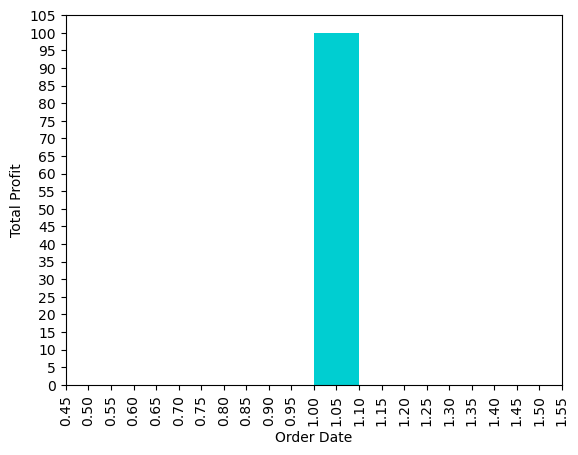

In [47]:
pd.pivot_table(sales_data,values='Total Profit',index='Order Date',aggfunc='count').plot(kind='hist',color='#00CED1',stacked=False,legend=None)
mp.xticks(rotation=90)
mp.ylabel('Total Profit')
mp.locator_params(nbins=32)
mp.xlabel('Order Date')

In [67]:
sales_data

,Order Date,Order Priority,Ship Date,Item Type,Region,Country,Sales Channel,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Order ID,,,,,,,,,,,,,
669165933,NaN,H,2010-06-27,Baby Food,Australia and Oceania,Tuvalu,Offline,9925,255.28,159.42,4870.26,1582243.50,951410.50
963881480,NaN,C,2012-09-15,Cereal,Central America and the Caribbean,Grenada,Online,2804,205.70,117.11,435466.90,328376.44,248406.36
341417157,NaN,L,2014-05-08,Office Supplies,Europe,Russia,Offline,1779,651.21,524.96,247956.32,933903.84,224598.75
514321792,NaN,C,2014-07-05,Fruits,Sub-Saharan Africa,Sao Tome and Principe,Online,8102,9.33,6.92,75591.66,56065.84,19525.82
115456712,NaN,L,2013-02-06,Office Supplies,Sub-Saharan Africa,Rwanda,Offline,5062,651.21,524.96,471336.91,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512878119,NaN,M,2011-09-03,Clothes,Sub-Saharan Africa,Mali,Online,888,109.28,35.84,5513227.50,31825.92,65214.72
810711038,NaN,L,2011-12-28,Fruits,Asia,Malaysia,Offline,6267,9.33,6.92,4368316.68,43367.64,15103.47
728815257,NaN,C,2016-06-29,Vegetables,Sub-Saharan Africa,Sierra Leone,Offline,1485,154.06,90.93,3876652.40,135031.05,93748.05


In [49]:
sales_data['Region'].unique()

array(['Australia and Oceania', 'Central America and the Caribbean',
       'Europe', 'Sub-Saharan Africa', 'Asia',
       'Middle East and North Africa', 'North America'], dtype=object)

In [50]:
regions = ['Australia and Oceania', 'Central America and the Caribbean',
       'Europe', 'Sub-Saharan Africa', 'Asia',
       'Middle East and North Africa', 'North America']

In [51]:
sales_data['Region'] = pd.Categorical(sales_data['Region'],categories = regions,ordered=True)

Text(0, 0.5, 'Total Cost')

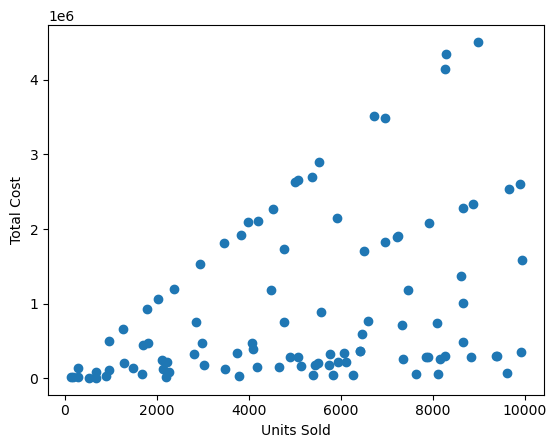

In [72]:
mp.scatter(sales_data['Units Sold'],sales_data['Total Cost'])
mp.xlabel('Units Sold')
mp.ylabel('Total Cost')

More the number of units sold of a product, more will be the total cost associated with it.

/Users/om/anaconda3/envs/tensorflow/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Australia and Oceania'),
  Text(1, 0, 'Central America and the Caribbean'),
  Text(2, 0, 'Europe'),
  Text(3, 0, 'Sub-Saharan Africa'),
  Text(4, 0, 'Asia'),
  Text(5, 0, 'Middle East and North Africa'),
  Text(6, 0, 'North America')])

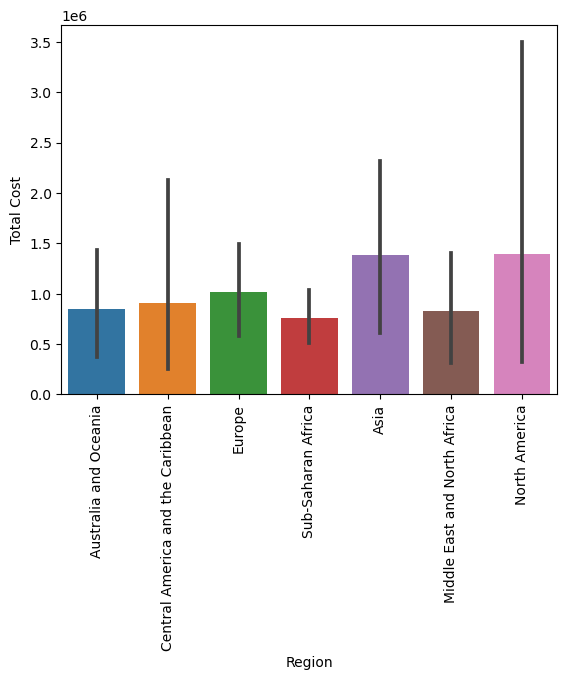

In [52]:
sn.barplot(x='Region',y='Total Cost',data=sales_data)
mp.xticks(rotation=90)

Cost of items is maximum in Asia and North America, and minimum in Sub-Saharan Africa.

/Users/om/anaconda3/envs/tensorflow/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/om/anaconda3/envs/tensorflow/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/om/anaconda3/envs/tensorflow/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/om/anaconda3/envs/tensorflow/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

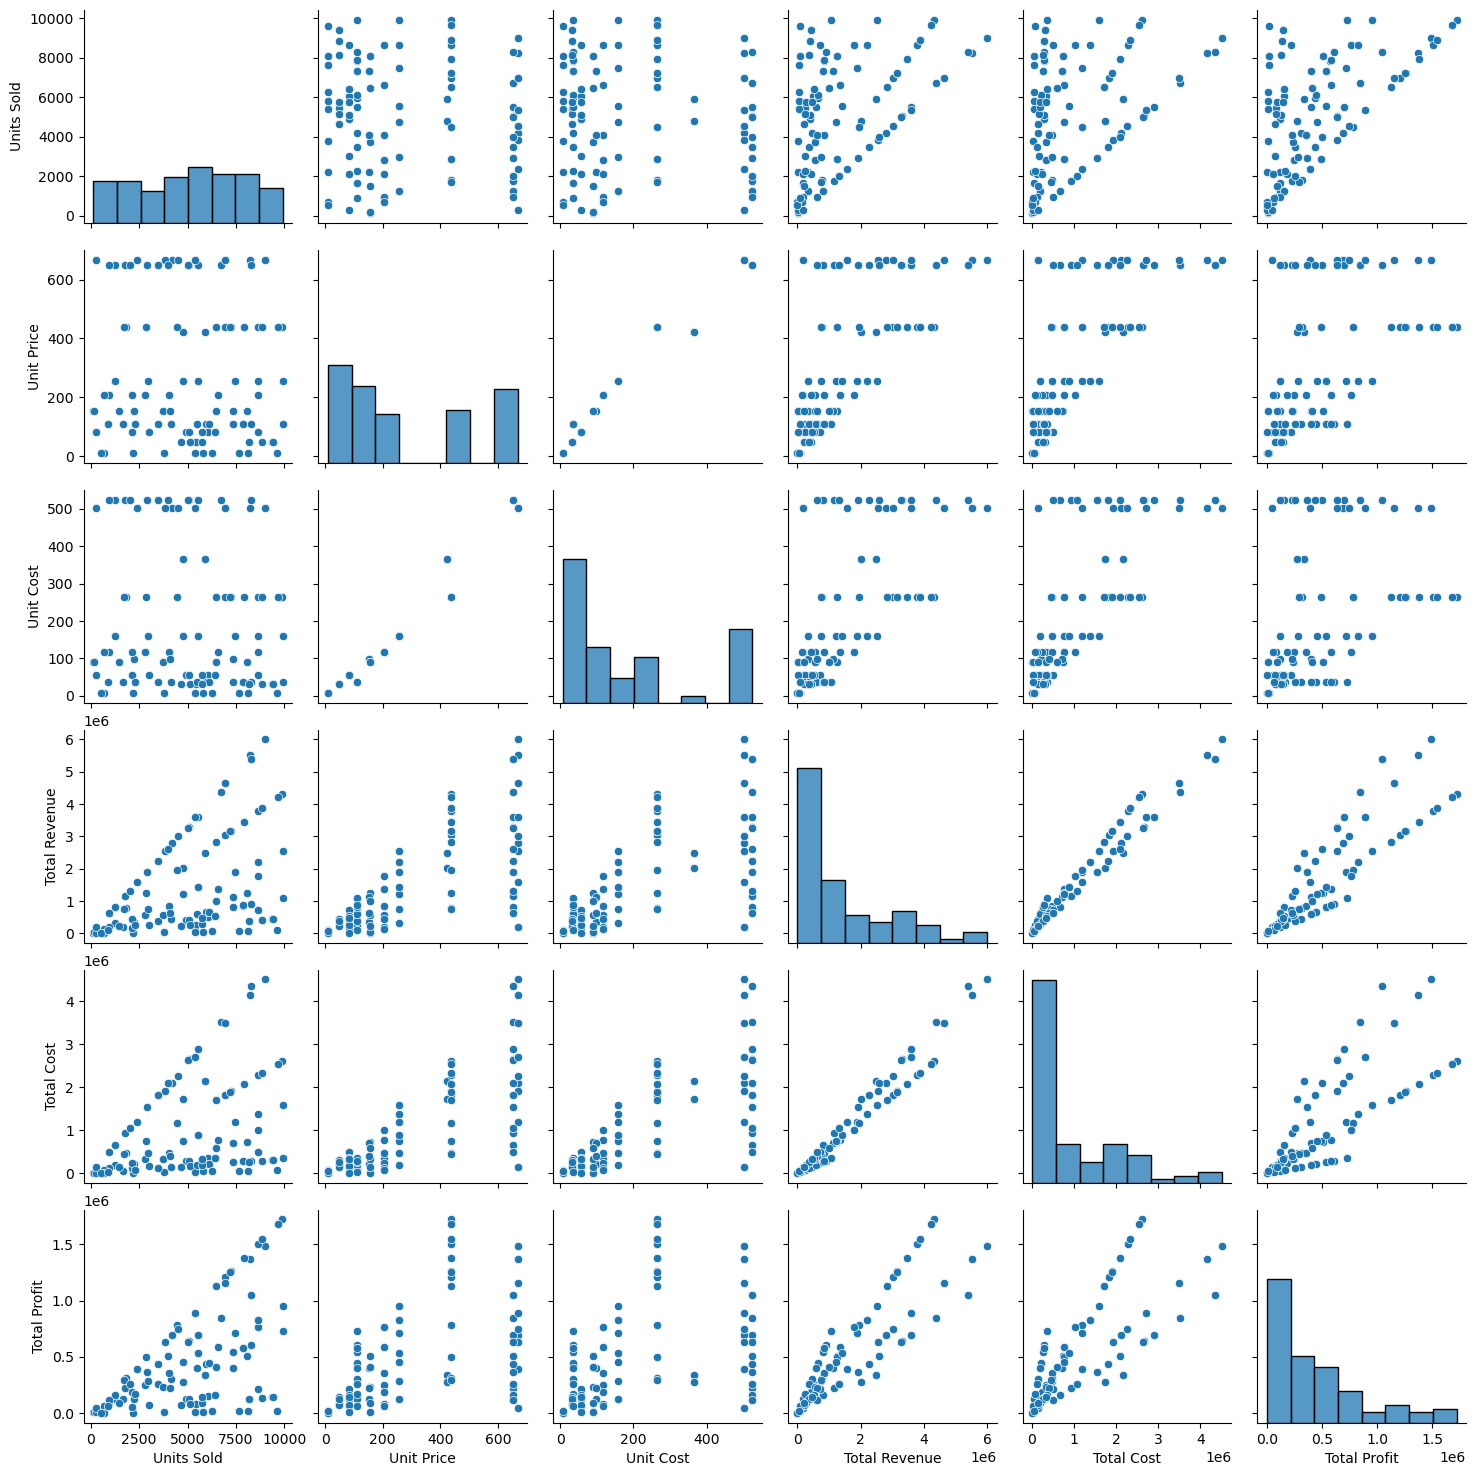

In [53]:
sn.pairplot(sales_data)

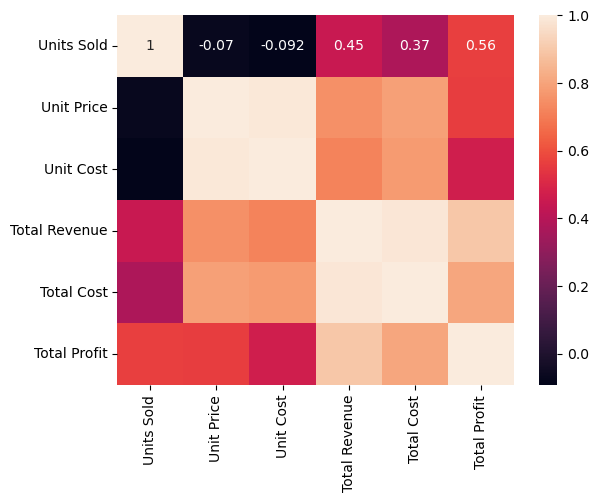

In [55]:
# Select only numeric columns
numeric_data = sales_data.select_dtypes(include=['float64', 'int64'])

# Now you can compute the correlation matrix and plot the heatmap
import seaborn as sn
import matplotlib.pyplot as plt

corr_matrix = numeric_data.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()


1) Total Cost is strongly related to Unit Price, Unit Cost and Total Profit.
2) Units Sold, Unit Price and Unit Cost are completely independent.
3) Unit Price, Unit Cost and Total Cost are independent of Total Revenue.

/var/folders/q_/qstqss8s0sqf4bqsqw9pj7hw0000gn/T/ipykernel_90123/57796221.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sn.lineplot(x='Region',y='Total Cost',data=sales_data,ci=None)
/Users/om/anaconda3/envs/tensorflow/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/om/anaconda3/envs/tensorflow/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Australia and Oceania'),
  Text(1, 0, 'Central America and the Caribbean'),
  Text(2, 0, 'Europe'),
  Text(3, 0, 'Sub-Saharan Africa'),
  Text(4, 0, 'Asia'),
  Text(5, 0, 'Middle East and North Africa'),
  Text(6, 0, 'North America')])

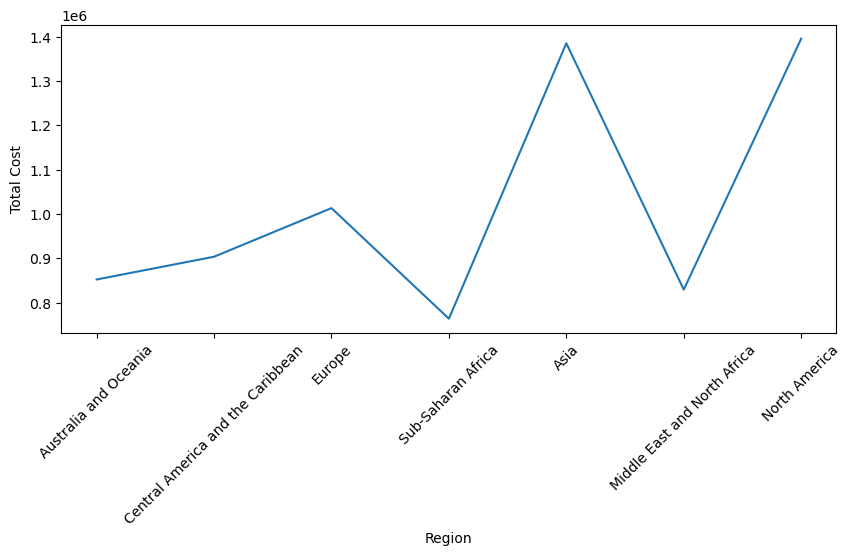

In [56]:
mp.figure(figsize=(10,4))
sn.lineplot(x='Region',y='Total Cost',data=sales_data,ci=None)
mp.xticks(rotation=45)

Products are more expensive in Asia and North America in comparison to other continents.

# Considering Countries

In [57]:
sales_data['Country'].unique()

array(['Tuvalu', 'Grenada', 'Russia', 'Sao Tome and Principe', 'Rwanda',
       'Solomon Islands', 'Angola', 'Burkina Faso',
       'Republic of the Congo', 'Senegal', 'Kyrgyzstan', 'Cape Verde',
       'Bangladesh', 'Honduras', 'Mongolia', 'Bulgaria', 'Sri Lanka',
       'Cameroon', 'Turkmenistan', 'East Timor', 'Norway', 'Portugal',
       'New Zealand', 'Moldova ', 'France', 'Kiribati', 'Mali',
       'The Gambia', 'Switzerland', 'South Sudan', 'Australia', 'Myanmar',
       'Djibouti', 'Costa Rica', 'Syria', 'Brunei', 'Niger', 'Azerbaijan',
       'Slovakia', 'Comoros', 'Iceland', 'Macedonia', 'Mauritania',
       'Albania', 'Lesotho', 'Saudi Arabia', 'Sierra Leone',
       "Cote d'Ivoire", 'Fiji', 'Austria', 'United Kingdom', 'San Marino',
       'Libya', 'Haiti', 'Gabon', 'Belize', 'Lithuania', 'Madagascar',
       'Democratic Republic of the Congo', 'Pakistan', 'Mexico',
       'Federated States of Micronesia', 'Laos', 'Monaco', 'Samoa ',
       'Spain', 'Lebanon', 'Iran', 'Zamb

In [58]:
countries = ['Tuvalu', 'Grenada', 'Russia', 'Sao Tome and Principe', 'Rwanda',
       'Solomon Islands', 'Angola', 'Burkina Faso',
       'Republic of the Congo', 'Senegal', 'Kyrgyzstan', 'Cape Verde',
       'Bangladesh', 'Honduras', 'Mongolia', 'Bulgaria', 'Sri Lanka',
       'Cameroon', 'Turkmenistan', 'East Timor', 'Norway', 'Portugal',
       'New Zealand', 'Moldova ', 'France', 'Kiribati', 'Mali',
       'The Gambia', 'Switzerland', 'South Sudan', 'Australia', 'Myanmar',
       'Djibouti', 'Costa Rica', 'Syria', 'Brunei', 'Niger', 'Azerbaijan',
       'Slovakia', 'Comoros', 'Iceland', 'Macedonia', 'Mauritania',
       'Albania', 'Lesotho', 'Saudi Arabia', 'Sierra Leone',
       "Cote d'Ivoire", 'Fiji', 'Austria', 'United Kingdom', 'San Marino',
       'Libya', 'Haiti', 'Gabon', 'Belize', 'Lithuania', 'Madagascar',
       'Democratic Republic of the Congo', 'Pakistan', 'Mexico',
       'Federated States of Micronesia', 'Laos', 'Monaco', 'Samoa ',
       'Spain', 'Lebanon', 'Iran', 'Zambia', 'Kenya', 'Kuwait',
       'Slovenia', 'Romania', 'Nicaragua', 'Malaysia', 'Mozambique']

In [61]:
sales_data['Country'] = pd.Categorical(sales_data['Country'],categories=countries,ordered=True)

/var/folders/q_/qstqss8s0sqf4bqsqw9pj7hw0000gn/T/ipykernel_90123/3722072339.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sn.barplot(x='Country', y='Total Revenue', data=sales_data, ci=None)
/Users/om/anaconda3/envs/tensorflow/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


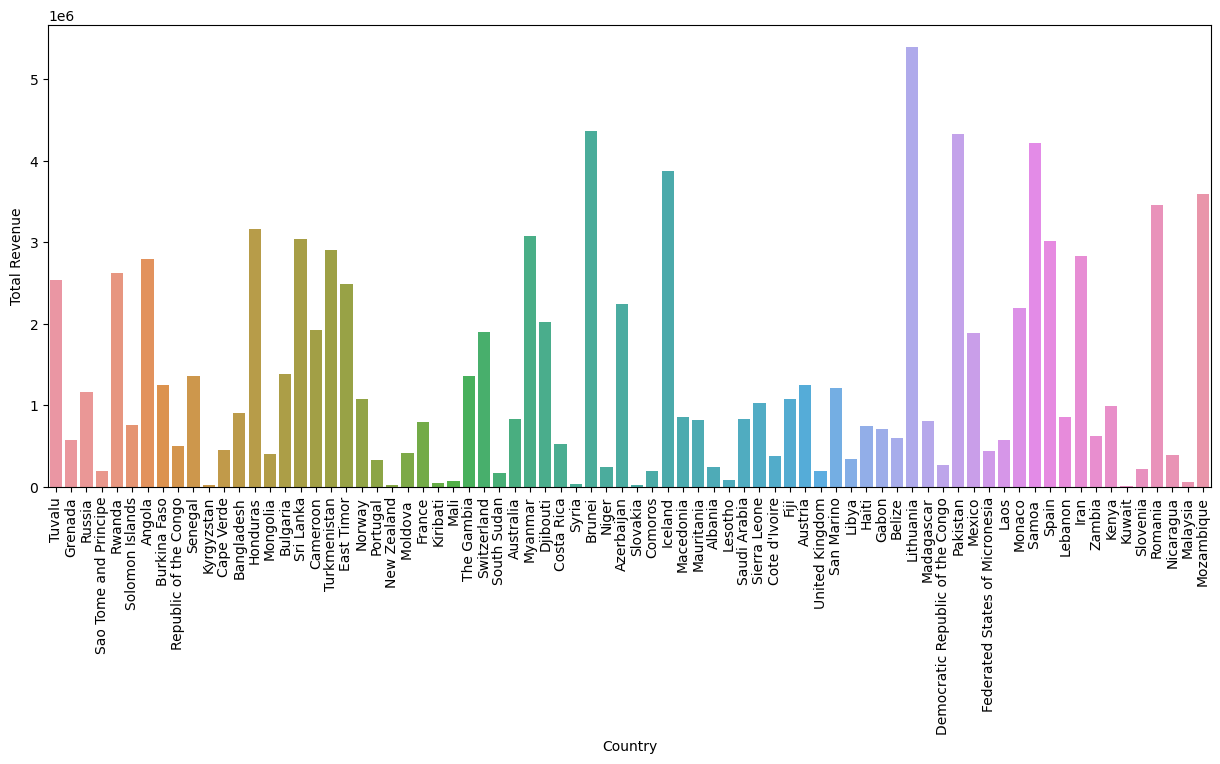

In [62]:
mp.figure(figsize=(15,6))
sn.barplot(x='Country', y='Total Revenue', data=sales_data, ci=None)
mp.xticks(rotation=90)
mp.tick_params(axis='x', which='major', labelsize=10)

Mozambique is the country where maximum revenue has been generated followed by Kenya.

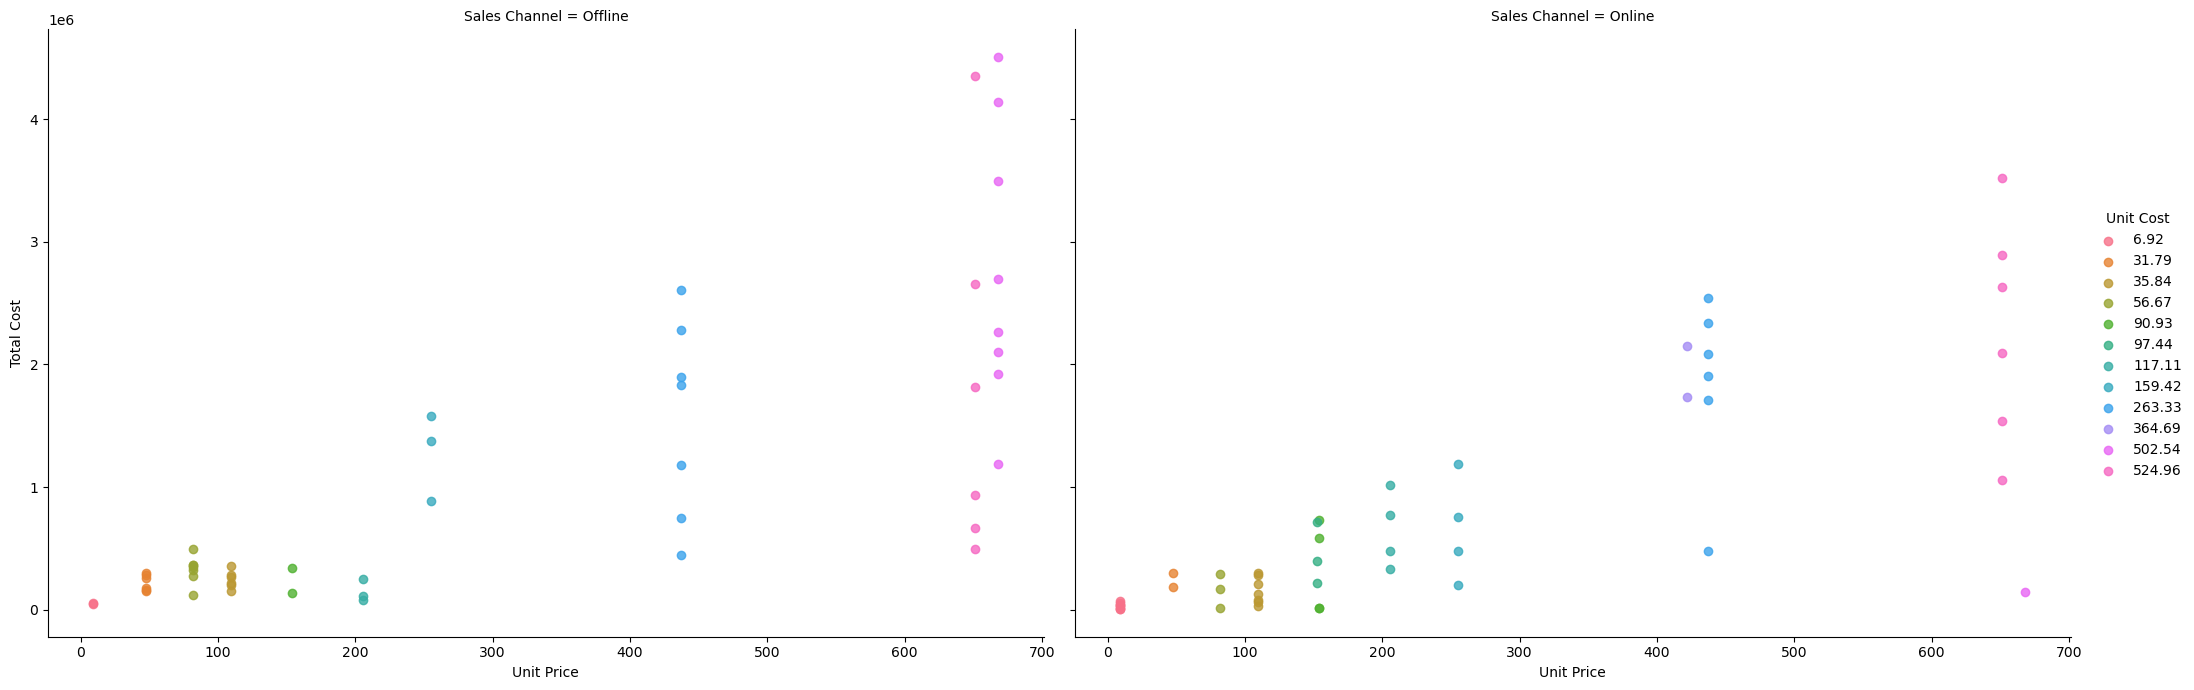

In [63]:
sn.lmplot(x='Unit Price',y='Total Cost',data=sales_data,col='Sales Channel',hue='Unit Cost',aspect=1.5,height=7)

In [64]:
sales_data.sort_values(by='Unit Price')

,Order Date,Order Priority,Ship Date,Item Type,Region,Country,Sales Channel,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Order ID,,,,,,,,,,,,,
142278373,9/8/2014,H,10/4/2014,Fruits,Australia and Oceania,New Zealand,Online,2187,9.33,6.92,20404.71,15134.04,5270.67
508980977,9/17/2013,H,10/24/2013,Fruits,Sub-Saharan Africa,Sao Tome and Principe,Offline,7637,9.33,6.92,71253.21,52848.04,18405.17
162052476,11/22/2011,L,12/3/2011,Fruits,Middle East and North Africa,Syria,Online,3784,9.33,6.92,35304.72,26185.28,9119.44
514321792,6/20/2014,C,7/5/2014,Fruits,Sub-Saharan Africa,Sao Tome and Principe,Online,8102,9.33,6.92,75591.66,56065.84,19525.82
810711038,11/11/2011,L,12/28/2011,Fruits,Asia,Malaysia,Offline,6267,9.33,6.92,58471.11,43367.64,15103.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886494815,5/26/2012,L,6/9/2012,Household,Sub-Saharan Africa,The Gambia,Offline,2370,668.27,502.54,1583799.90,1191019.80,392780.10
213487374,10/21/2012,L,11/30/2012,Household,Europe,Spain,Offline,4513,668.27,502.54,3015902.51,2267963.02,747939.49
955357205,1/5/2012,L,2/14/2012,Household,Europe,United Kingdom,Online,282,668.27,502.54,188452.14,141716.28,46735.86


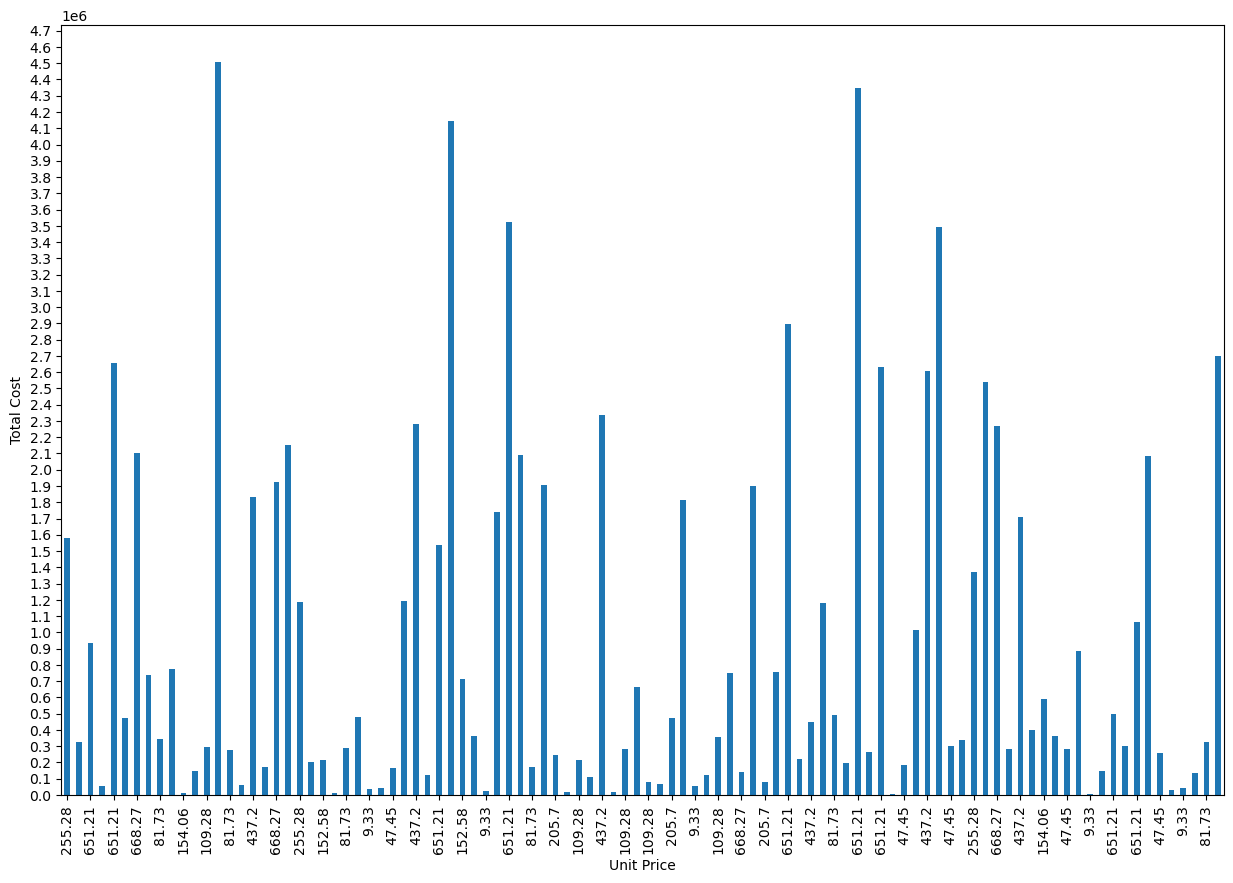

In [65]:
sales_data.plot.bar(x='Unit Price',y='Total Cost',legend=None,figsize=(15,10),rot=0)
mp.ylabel('Total Cost')
mp.xticks(rotation=90)
mp.locator_params(nbins=90)

The above bar plot suggests that higher the value of unit price of a product, more will be the total cost of it.

In [66]:
np.cov(sales_data['Unit Price'],sales_data['Total Cost'])

array([[5.55037038e+04, 2.01205393e+08],
       [2.01205393e+08, 1.17492213e+12]])

In [67]:
np.corrcoef(sales_data['Unit Price'],sales_data['Total Cost'])

array([[1.        , 0.78790543],
       [0.78790543, 1.        ]])

The high value of degree of correlation between 'Unit Price' and 'Total Cost' variables indicates that they are almost directly proportional to each other and highly dependent on each other.

/var/folders/q_/qstqss8s0sqf4bqsqw9pj7hw0000gn/T/ipykernel_90123/2994715304.py:1: FutureWarning: The provided callable <function median at 0x1060d74c0> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  pd.pivot_table(sales_data,index='Item Type',values='Total Profit',aggfunc=np.median).plot(kind='line',color='#854442',figsize=(15,5),legend=None)


Text(0, 0.5, 'Total Profit')

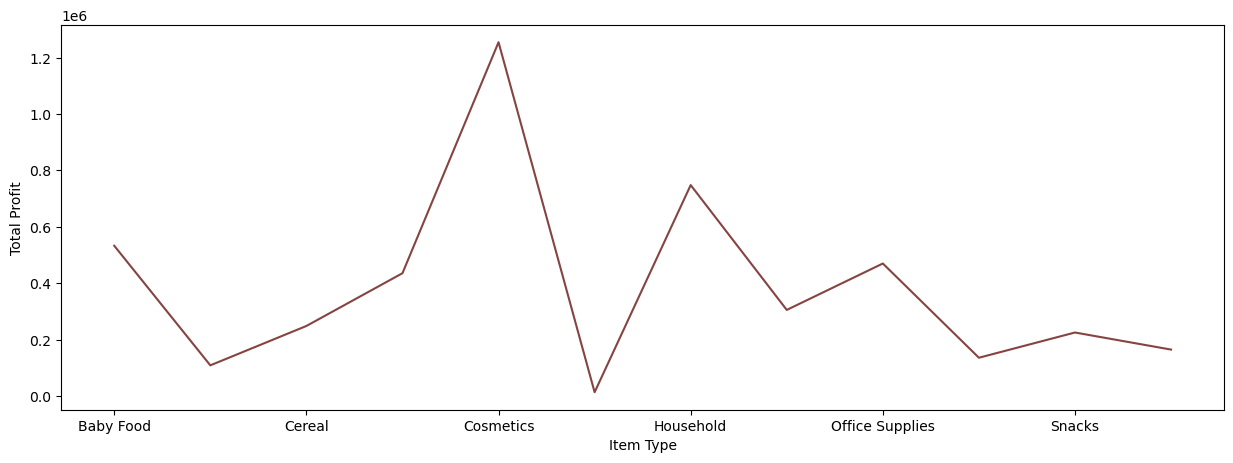

In [69]:
pd.pivot_table(sales_data,index='Item Type',values='Total Profit',aggfunc=np.median).plot(kind='line',color='#854442',figsize=(15,5),legend=None)
mp.ylabel('Total Profit')

/var/folders/q_/qstqss8s0sqf4bqsqw9pj7hw0000gn/T/ipykernel_90123/2721864630.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_data.groupby('Region')['Total Profit'].count().plot(kind='area',color='#512E5F')


Text(0, 0.5, 'Total Profit')

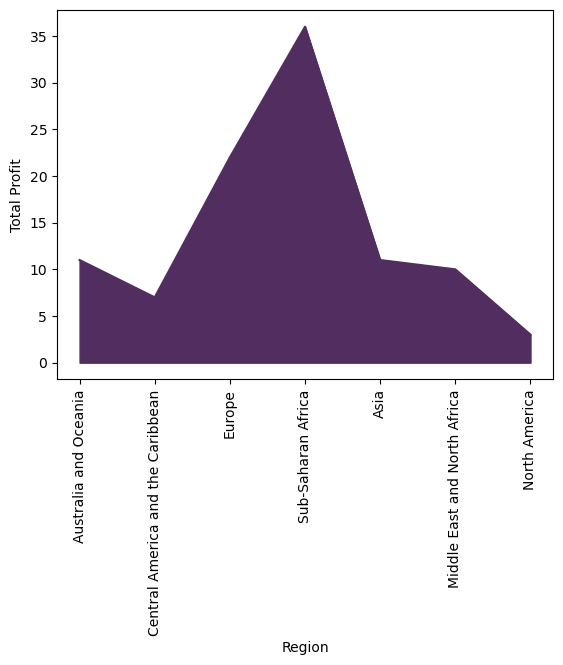

In [70]:
sales_data.groupby('Region')['Total Profit'].count().plot(kind='area',color='#512E5F')
mp.xticks(rotation=90)
mp.ylabel('Total Profit')

Maximum profit has been generated in the Sub-Saharan African region while minimum profit has been generated in the North American region.

# Consider Order priority

In [71]:
sales_data['Order Priority'].unique()

array(['H', 'C', 'L', 'M'], dtype=object)

In [72]:
order_priorities = ['H', 'C', 'L', 'M']

In [73]:
sales_data['Order Priority'] = pd.Categorical(sales_data['Order Priority'],categories=order_priorities,ordered=True)

Text(0, 0.5, 'Total Revenue')

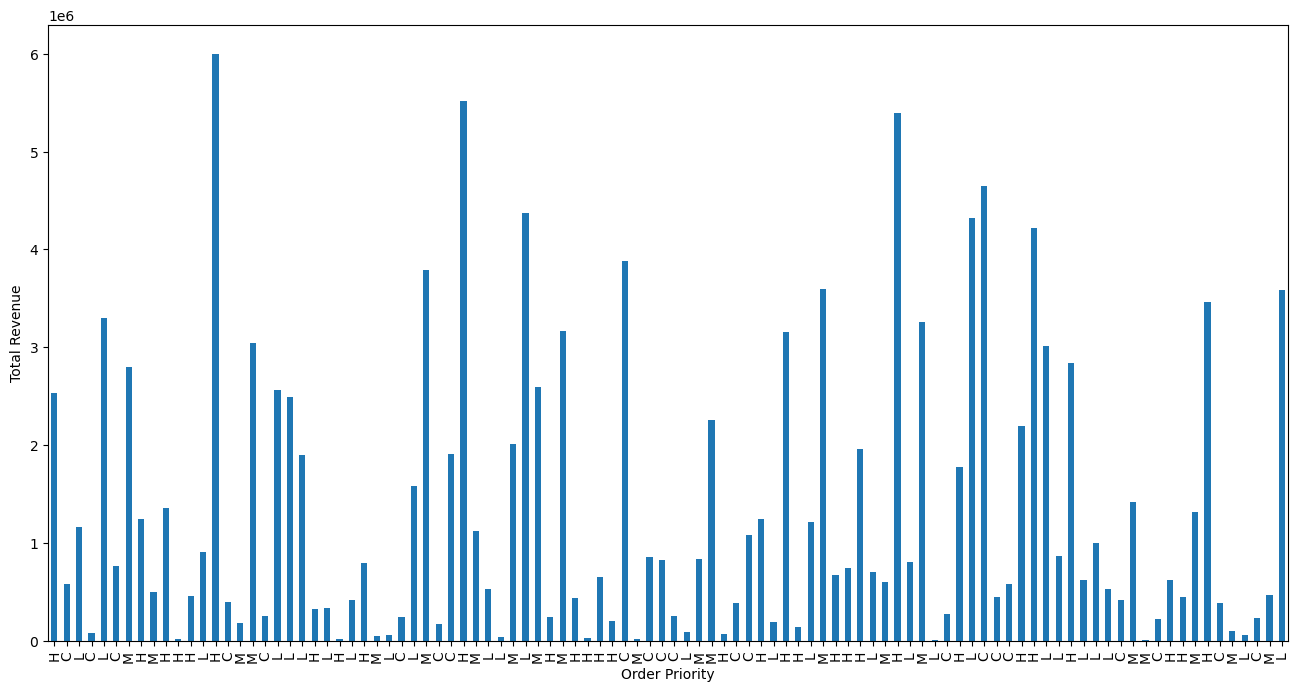

In [74]:
sales_data.plot.bar(x='Order Priority',y='Total Revenue',legend=None,figsize=(16,8))
mp.xticks(rotation=90)
mp.ylabel('Total Revenue')

/var/folders/q_/qstqss8s0sqf4bqsqw9pj7hw0000gn/T/ipykernel_90123/1180720062.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_data.groupby('Order Priority')['Total Revenue'].count().plot(kind='bar',color=['#512E5F','#45B39D','#AAB7B8','#20B2AA','#854442'])


Text(0, 0.5, 'Total Revenue')

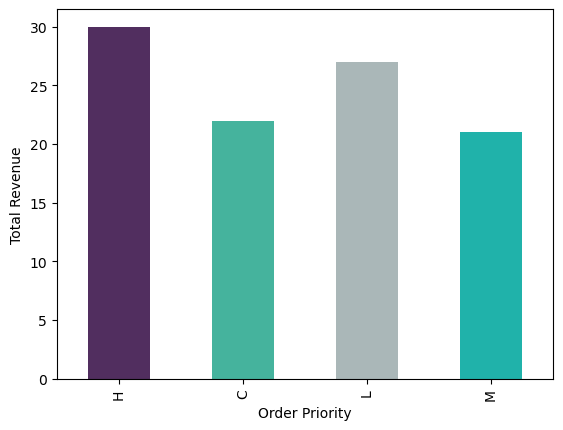

In [75]:
sales_data.groupby('Order Priority')['Total Revenue'].count().plot(kind='bar',color=['#512E5F','#45B39D','#AAB7B8','#20B2AA','#854442'])
mp.ylabel('Total Revenue')

Maximum number of revenues has been generated by the products having order priority 'H' while minimum revenues has been generated by 'M' priority products.

/var/folders/q_/qstqss8s0sqf4bqsqw9pj7hw0000gn/T/ipykernel_90123/134443358.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_data.groupby('Order Priority')['Total Profit'].sum().plot(kind='bar',color=['#854442','#000000','#fff4e6','#3c2f2f'])


Text(0.5, 1.0, 'Distribution of profit on the basis of order priority')

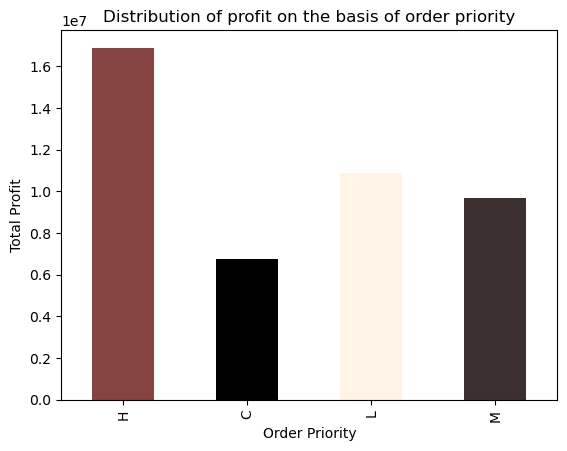

In [76]:
sales_data.groupby('Order Priority')['Total Profit'].sum().plot(kind='bar',color=['#854442','#000000','#fff4e6','#3c2f2f'])
mp.ylabel('Total Profit')
mp.title('Distribution of profit on the basis of order priority')

Maximum profit has been generated by products having order priority 'H' while minimum profit has been obtained in case of 'C' priority product orders.

(<Figure size 900x600 with 13 Axes>,
 [<Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >])

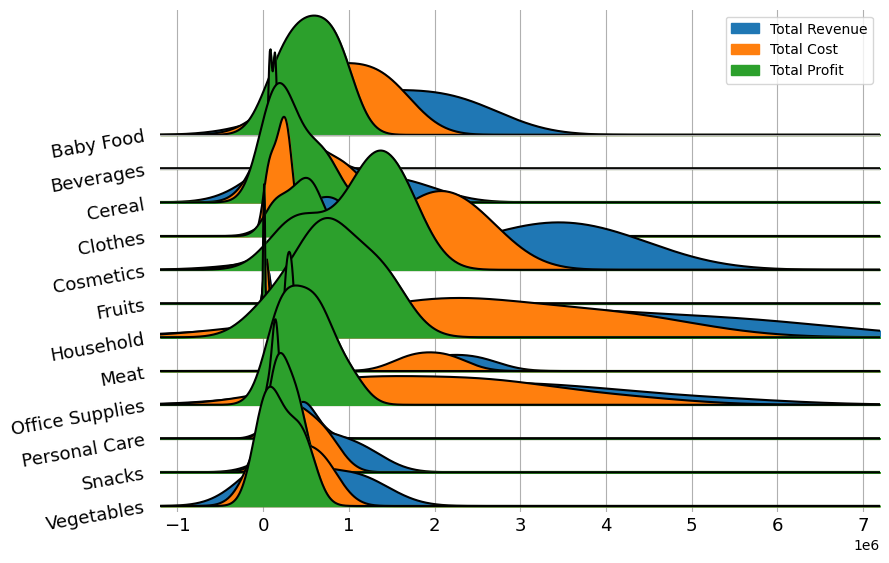

In [77]:
joypy.joyplot(sales_data,column=['Total Revenue','Total Cost','Total Profit'],by='Item Type',figsize=(9,6),xlabelsize=13,ylim='own',ylabelsize=13,grid='both',yrot=10,fill=True,legend=True,overlap=2)

# Ship Date and Profit relation

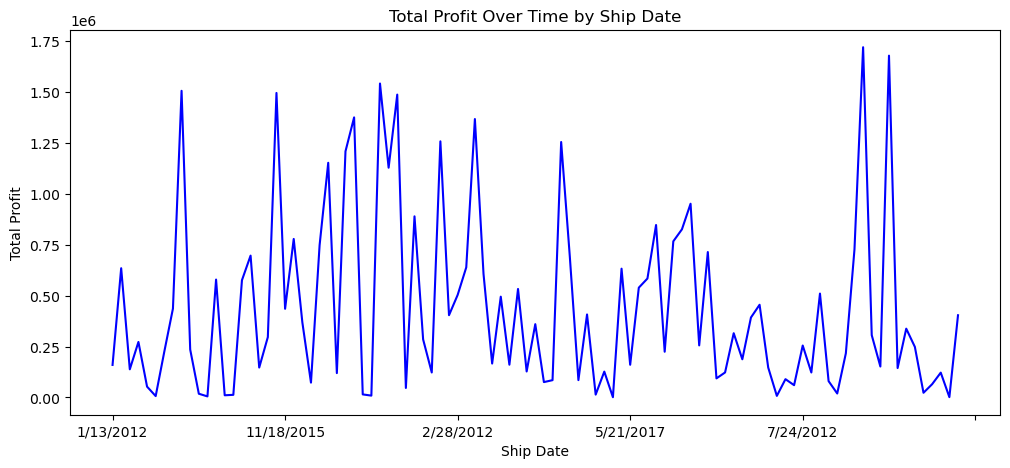

In [82]:
# Sort the data by 'Ship Date'
sorted_data = sales_data.sort_values(by='Ship Date')

# Group by 'Ship Date' and calculate the total profit, then plot it
mp.figure(figsize=(12, 5))
sorted_data.groupby('Ship Date')['Total Profit'].sum().plot(kind='line', color='blue')
mp.ylabel('Total Profit')
mp.title('Total Profit Over Time by Ship Date')
mp.show()

Maximum profit has been achieved during the year 2014.

In [83]:
np.max(sales_data.loc[:,'Total Profit'].iloc[:])

1719922.04

In [84]:
np.set_printoptions = True

In [85]:
pd.DataFrame(sales_data.value_counts())

,,,,,,,,,,,,,count
Order Date,Order Priority,Ship Date,Item Type,Region,Country,Sales Channel,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,
1/11/2012,C,1/13/2012,Office Supplies,Sub-Saharan Africa,Mauritania,Offline,1266,651.21,524.96,824431.86,664599.36,159832.50,1
5/26/2012,L,6/9/2012,Household,Sub-Saharan Africa,The Gambia,Offline,2370,668.27,502.54,1583799.90,1191019.80,392780.10,1
6/26/2013,L,7/1/2013,Baby Food,Europe,San Marino,Online,4750,255.28,159.42,1212580.00,757245.00,455335.00,1
6/24/2011,H,7/12/2011,Vegetables,Asia,Kyrgyzstan,Online,124,154.06,90.93,19103.44,11275.32,7828.12,1
6/20/2014,C,7/5/2014,Fruits,Sub-Saharan Africa,Sao Tome and Principe,Online,8102,9.33,6.92,75591.66,56065.84,19525.82,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/31/2016,C,12/31/2016,Cosmetics,Europe,Iceland,Online,8867,437.20,263.33,3876652.40,2334947.11,1541705.29,1
12/30/2010,L,1/20/2011,Household,Asia,Turkmenistan,Offline,3830,668.27,502.54,2559474.10,1924728.20,634745.90,1
12/29/2013,C,1/28/2014,Personal Care,Sub-Saharan Africa,South Sudan,Offline,2125,81.73,56.67,173676.25,120423.75,53252.50,1


/Users/om/anaconda3/envs/tensorflow/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/om/anaconda3/envs/tensorflow/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/q_/qstqss8s0sqf4bqsqw9pj7hw0000gn/T/ipykernel_90123/54907398.py:2: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  mp.locator_params(nbins=10)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Baby Food'),
  Text(1, 0, 'Cereal'),
  Text(2, 0, 'Office Supplies'),
  Text(3, 0, 'Fruits'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Vegetables'),
  Text(6, 0, 'Personal Care'),
  Text(7, 0, 'Clothes'),
  Text(8, 0, 'Cosmetics'),
  Text(9, 0, 'Beverages'),
  Text(10, 0, 'Meat'),
  Text(11, 0, 'Snacks')])

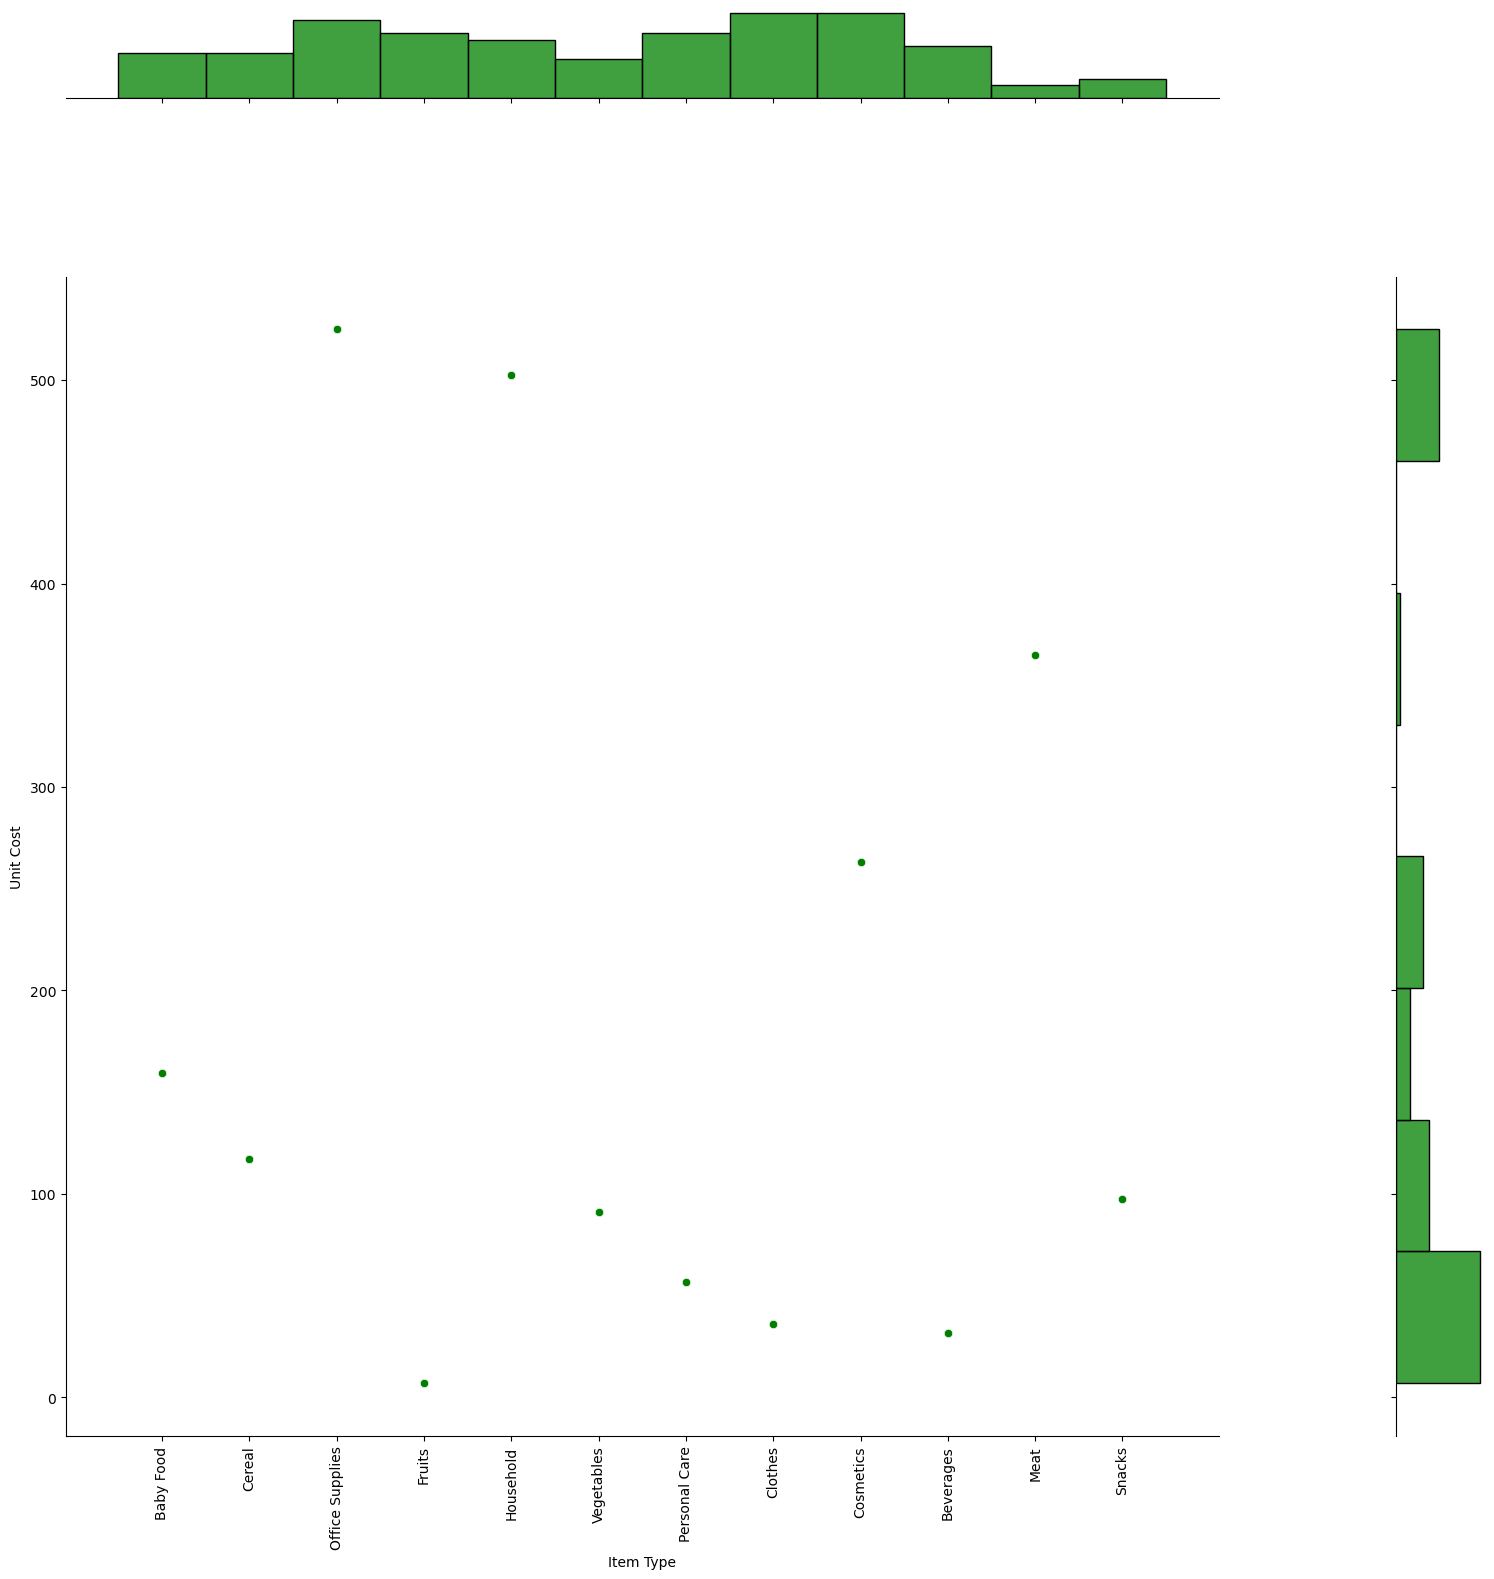

In [86]:
sn.jointplot(x='Item Type',y='Unit Cost',data=sales_data,kind='scatter',color="g",height=15,ratio=5,dropna=True,space=2)
mp.locator_params(nbins=10)
mp.xticks(rotation=90)

Office Supplies have the maximum unit cost while Fruits have minimum unit cost.

In [87]:
np.max(sales_data['Unit Cost'])

524.96

In [88]:
temp = sales_data.copy()
temp['Unit Cost'] = temp['Unit Cost'].sort_values()

In [101]:
temp.sort_values(by='Unit Cost',inplace=True)

In [102]:
temp.tail(1)

,Order Date,Order Priority,Ship Date,Item Type,Region,Country,Sales Channel,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Order ID,,,,,,,,,,,,,
837559306,1/11/2012,C,1/13/2012,Office Supplies,Sub-Saharan Africa,Mauritania,Offline,1266,651.21,524.96,824431.86,664599.36,159832.5


In [103]:
temp.head(1)

,Order Date,Order Priority,Ship Date,Item Type,Region,Country,Sales Channel,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Order ID,,,,,,,,,,,,,
508980977,9/17/2013,H,10/24/2013,Fruits,Sub-Saharan Africa,Sao Tome and Principe,Offline,7637,9.33,6.92,71253.21,52848.04,18405.17


/Users/om/anaconda3/envs/tensorflow/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/om/anaconda3/envs/tensorflow/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


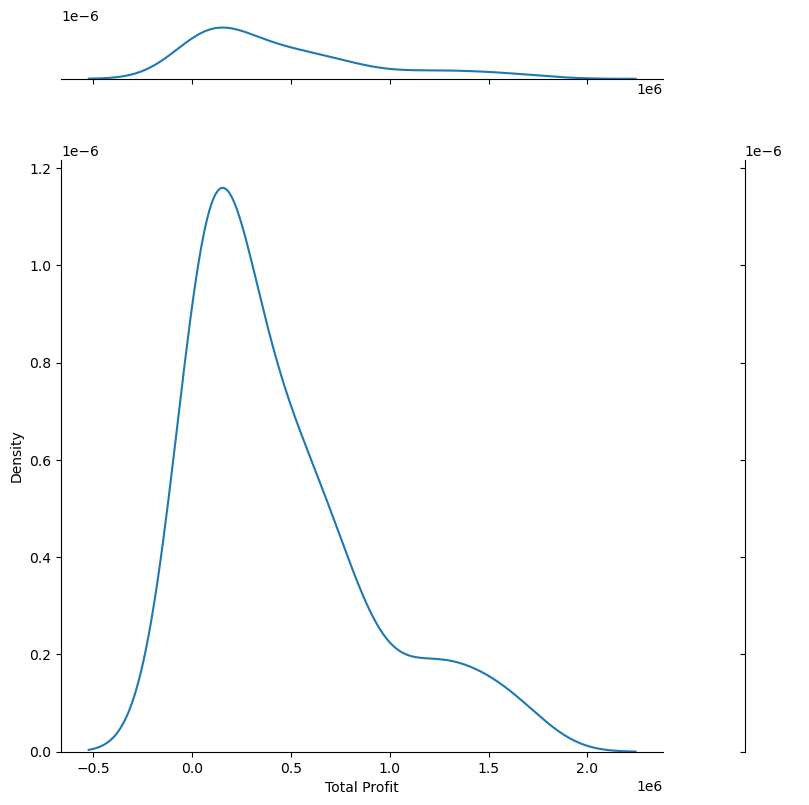

In [104]:
sn.jointplot(x='Total Profit',data=sales_data,height=8,ratio=5,kind='kde',space=1.5)

# Consider Item types

In [110]:
sales_data['Item Type'].value_counts()

Item Type
Clothes            13
Cosmetics          13
Office Supplies    12
Fruits             10
Personal Care      10
Household           9
Beverages           8
Baby Food           7
Cereal              7
Vegetables          6
Snacks              3
Meat                2
Name: count, dtype: int64

In [111]:
sales_data['Item Type'].dropna(inplace=True)

In [112]:
labels = sales_data['Item Type'].value_counts().index

In [113]:
sizes = sales_data['Item Type'].value_counts().values
colors = ['#b1e7cd','#854442','#fff4e6','#3c2f2f','#512E5F','#45B39D']

Text(0.5, 1.0, 'Distribution of Item Types')

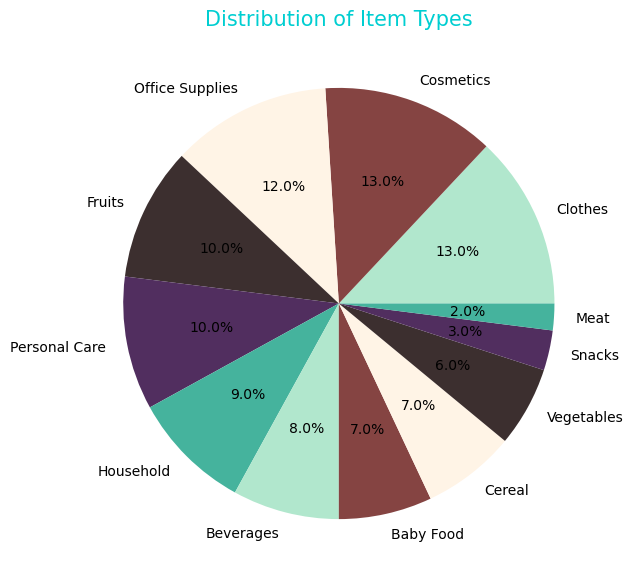

In [114]:
mp.figure(figsize=(7,7))
mp.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%')
mp.title('Distribution of Item Types',fontsize=15,color='#00CED1')

Clothes and cosmetics are the most purchased items while meat and snacks are the least purchased ones.

# LM Plot

In [115]:
sales_data['Country'].nunique()


76

In [116]:
countries_data = pd.DataFrame(sales_data['Country'].unique())
countries_data

,0
0,Tuvalu
1,Grenada
2,Russia
3,Sao Tome and Principe
4,Rwanda
...,...
71,Slovenia
72,Romania
73,Nicaragua
74,Malaysia


In [117]:
countries_data.value_counts()

Tuvalu         1
Fiji           1
Belize         1
Gabon          1
Haiti          1
              ..
France         1
Moldova        1
New Zealand    1
Portugal       1
Mozambique     1
Name: count, Length: 76, dtype: int64

In [118]:
countries = sales_data['Country'].values.tolist()

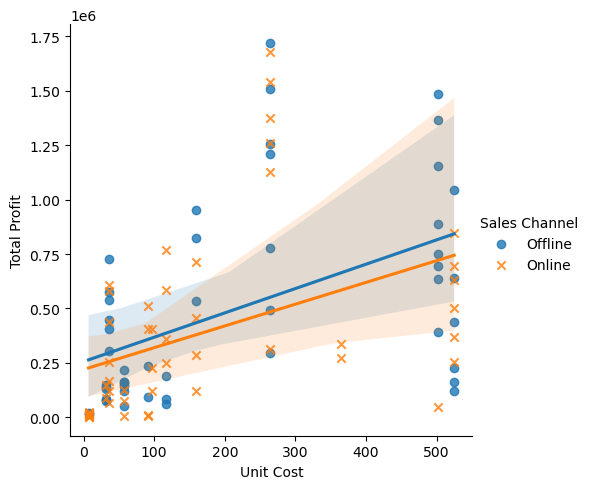

In [119]:
sn.lmplot(x='Unit Cost',y='Total Profit',data=sales_data,height=5,aspect=1,hue='Sales Channel',logx=False,truncate=True,ci=100,y_jitter=2.2,scatter=True,fit_reg=True,markers=['o','x'])

From the above LM plot, we can infer that profit keeps on increasing with increase in unit cost.

# KDE Plot

In [120]:
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

/var/folders/q_/qstqss8s0sqf4bqsqw9pj7hw0000gn/T/ipykernel_90123/3370295059.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sn.kdeplot(x='Order Date',y='Units Sold',data=sales_data,shade=True,cut=3)
/Users/om/anaconda3/envs/tensorflow/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/om/anaconda3/envs/tensorflow/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Order Date', ylabel='Units Sold'>

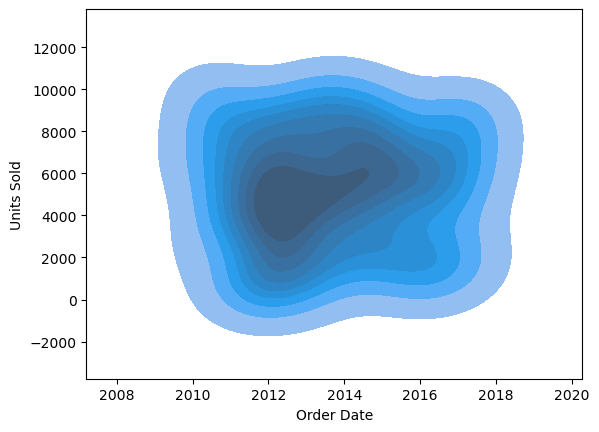

In [121]:
sn.kdeplot(x='Order Date',y='Units Sold',data=sales_data,shade=True,cut=3)

In [122]:
sales_data['Ship Date'] = pd.to_datetime(sales_data['Ship Date'])

/var/folders/q_/qstqss8s0sqf4bqsqw9pj7hw0000gn/T/ipykernel_90123/2839166257.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sn.kdeplot(x='Ship Date',y='Total Cost',data=sales_data,shade=True,cut=2)
/Users/om/anaconda3/envs/tensorflow/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/om/anaconda3/envs/tensorflow/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Ship Date', ylabel='Total Cost'>

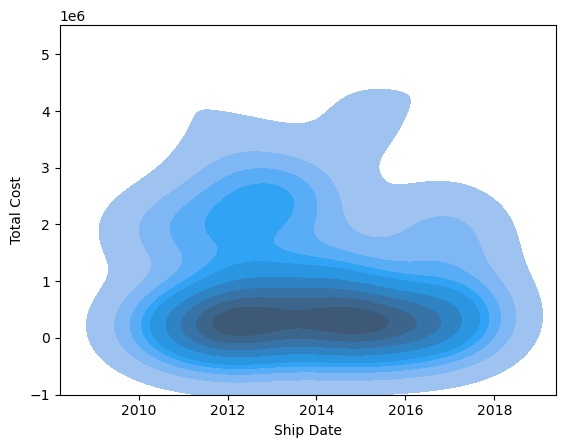

In [123]:
sn.kdeplot(x='Ship Date',y='Total Cost',data=sales_data,shade=True,cut=2)

# Violin Plot

In [124]:
pal = sn.cubehelix_palette(2, rot=-.5, dark=.3)

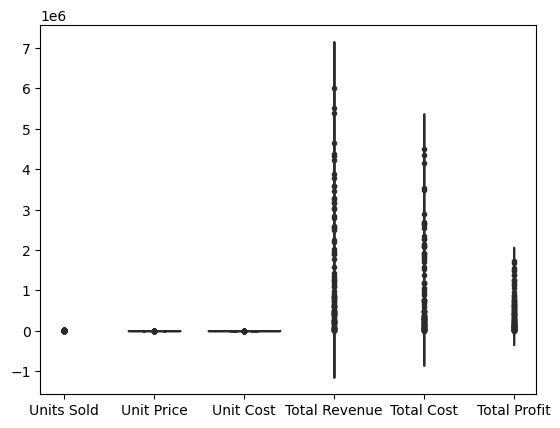

In [125]:
sn.violinplot(data=sales_data,palette=pal,inner="points")
list_a = list(range(12))
mp.locator_params(axis='y',nbins=10)
mp.locator_params(axis='x',nbins=10)

Text(0, 0.5, 'Total Profit')

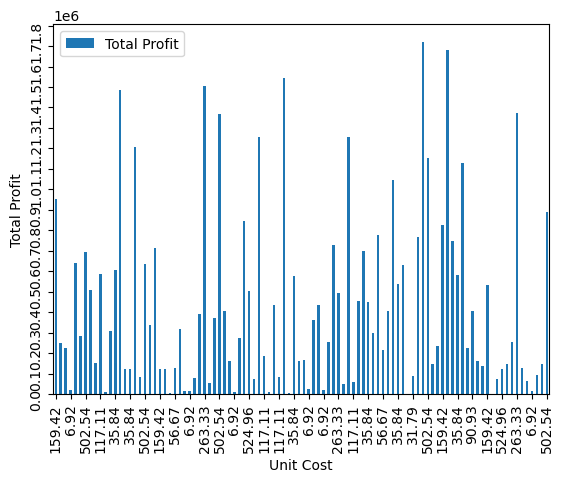

In [127]:
sales_data.plot(x='Unit Cost', y='Total Profit', kind='bar')
mp.xticks(rotation=90,fontsize=10)
mp.yticks(rotation=90,fontsize=10)
mp.locator_params(axis='x',nbins=40)
mp.locator_params(axis='y',nbins=30)
mp.ylabel('Total Profit')

Text(0.5, 1.0, 'Revenue generated per Order Date')

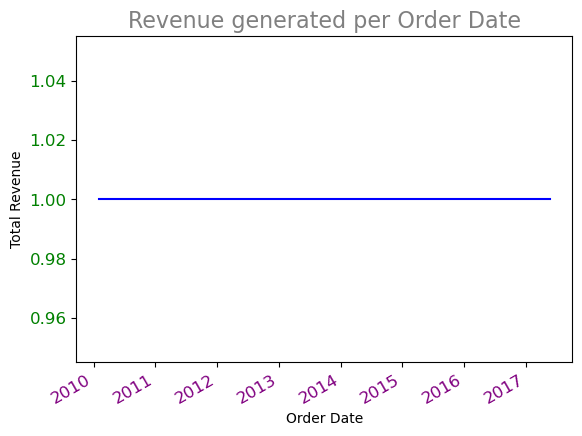

In [128]:
pd.pivot_table(index='Order Date',values='Total Revenue',data=sales_data,aggfunc='count').plot(kind='line',color='blue',legend=False)
mp.ylabel('Total Revenue')
mp.yticks(fontsize=12,color='green')
mp.xticks(fontsize=12,color='purple')
mp.title('Revenue generated per Order Date',fontsize=16,color='grey')

Total revenue remains constant for every year from 2010 to 2017.

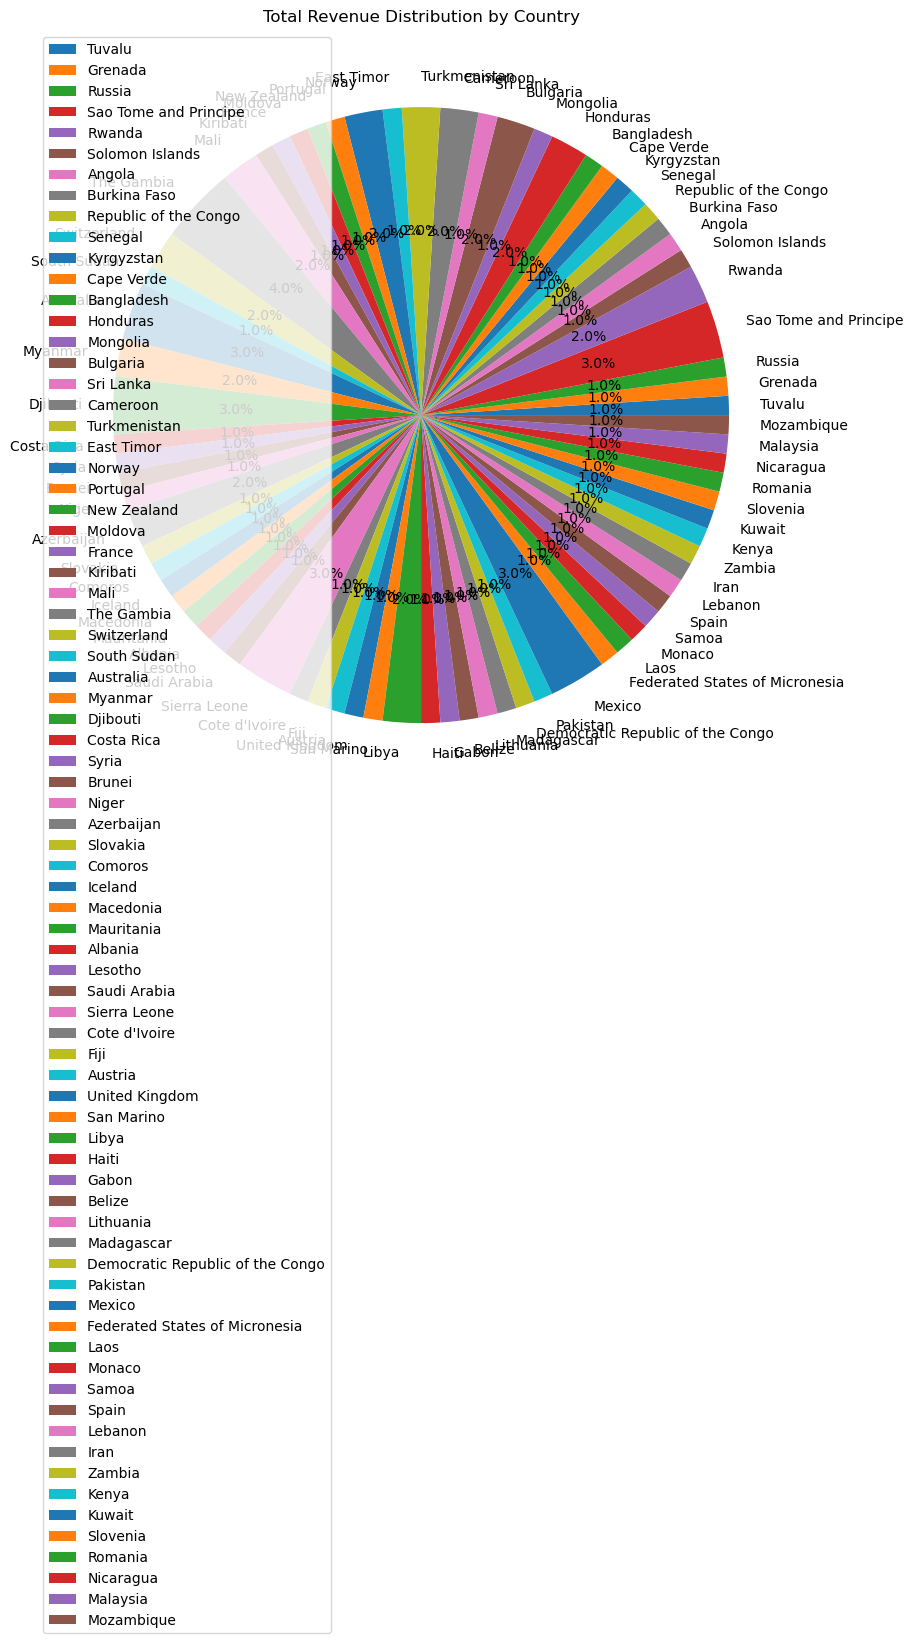

In [135]:
# Create a pivot table that counts 'Total Revenue' for each 'Country'
pivot_table = pd.pivot_table(index='Country', values='Total Revenue', data=sales_data, aggfunc='count')

# Plot a pie chart using the 'Total Revenue' values
pivot_table.plot(kind='pie', y='Total Revenue', figsize=(20, 10), autopct='%1.1f%%')
mp.ylabel('')  # Remove the y-axis label for a cleaner look
mp.title('Total Revenue Distribution by Country')
mp.show()

# Conclusion:

1) The high value of Pearson correlation coefficient between Total Revenue and Total Profit indicates that these two variables are closely related to each other.
2) Revenue generated is directly proportional to profit generated and vice versa.
3) The negative value of correlation coefficient among Units Sold and Unit Cost implies that quantity of products is inversely proportional to their cost. Same is the scenario with Units Sold and Units Price. Lesser the number of units of a product available, more will be it's price.
5) At an average, the profit generated for a product is ₹441681.98.
6) Maximum and minimum profit generated are ₹ 1719922.04 and ₹ 1258.09 respectively.
7) Maximum and minimum revenue generated by the product are ₹ 5997054.98 and ₹ 4870.26.
8) Revenue has very high variability in it's distribution. The median revenue generated is ₹ 752314.36.
9) Maximum and minimum unit costs are ₹ 6.92 and ₹ 524.96 respectively. Average unit cost of a product is ₹ 191.05. The Unit Cost variable varies considerably throughout it's distribution. The median cost of a unit stands at ₹ 107.28.
10) Maximum profit has been generated in the unit price range of ₹400-₹500.
11) Maximum profit has been generated when the number of units sold were between 8000 and 10000 i.e. more the number of units sold, more will be the profit generated
12) Maximum cost has been generated when 8000-9000 units were sold.
13) Maximum revenue has been generated when 5000-6500 units of a product were sold.
14) Maximum revenue has been generated from the items 'Clothes' and 'Cosmetics' closely followed by 'Office Supplies'.
15) More the number of units sold of a product, more will be the total cost associated with it.
16) Cost of items is maximum in Asia and North America, and minimum in Sub-Saharan Africa.
17) Total Cost is strongly related to Unit Price,Unit Cost and Total Profit.
18) Units Sold and Unit Price and Unit Cost are completely independent.
19) Unit Cost, Unit Price and Total Cost are almost completely independent of Total Revenue.
20) Products have been much more expensive in Asia and North America in comparison to other continents.
21) Mozambique is the country where maximum revenue has been generated followed by Kenya
22) Maximum profit has been generated in the Sub-Saharan African region while minimum profit has been generated in the North American region.
23) Maximum profit has been achieved during the year 2014.
24) Office Supplies have the maximum unit cost while Fruits have minimum unit cost.
25) Clothes and cosmetics are the most purchased items while meat and snacks are the least purchased ones.